<h1 style="font-weight:bold"> EDA on Fire Data and Preprocessing </h1>


In this notebook we are going to clean up our datasets and combine them to create the final dataset we are going to use with our models. We have decided to go with a classification problem to see if our data can be used to predict a fire event ("1") or a non-fire event ("0").
To do this we are going to use forest fire data from Canada, weather data from western Canada, El Nino data and city data from all of Canada. 

In [431]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import math
import warnings
warnings.filterwarnings('ignore')

# 1. Fire Data

The fire data we are using was downloaded from Natural Resources Canada, the official source is:

Canadian Forest Service. 2022.  <br>
Canadian National Fire Database – Agency Fire Data. Natural Resources Canada, Canadian  <br>
Forest Service, Northern Forestry Centre, Edmonton, Alberta. https://cwfis.cfs.nrcan.gc.ca.   <br>

The data that we find here is as follows:
|  COLUMN NAME  |	DESCRIPTION |	DATA TYPE	| NOTES |
|------------------|---------------|--------------|----------------------------------------------|
|FID |	 Fire ID numbered from 0 up to total fires in the  data |	int64   |		|
|SRC_AGENCY |	Agency from which the fire data has been obtained|   string   |  Individual provinces like BC, AB, ON but also provincial parks denoted as PC-     |
|YEAR |	Year of fire as reported by individual agencies. |	int64	|   |
|FIRE_ID	| Fire ID number reported by agency |	string |     |		
|FIRENAME |	 Agency reported fire name	| string	| |	
|LATITUDE	| Latitude of fire |	double	|reported latitude of where the fire started	|
|LONGITUDE |	Longitude of fire |	double |	Reported longitude of where the fire started.|
|MONTH |	Month of when the fire started |	int64 |	Reported by each agency.|	
|DAY |	Day of when the fire started |	int64 |	Reported by each agency.|	
|REP_DATE|	Date when the fire was reported | datetime |    |		
|SIZE_HA|	Final size of the fire in ha |	double | This should be reported by agencies.   |		
|ATTK_DATE	|Date the fire was first attacked by fire fighters|	date	|  |	
|OUT_DATE	|Date the fire was put out|	date |	|
|CAUSE |	Fire Cause |	String |	Reported by each agency and normalized.|	
|PROTZONE |	Protection Zone as indicated by source agency |	string |	.|	
|FIRE_TYPE|	 Type of the fire | string | This is not normalized to an official standard   |		
|MORE_INFO|	Additional attributes |	string |    |		
|CFS_REF_ID 	|Fire reference ID|	string	|  |	
|ACQ_DATE	|Date the fire was acquired from the agency|	date |	|
|CFS_NOTE1  |	Additional Notes |	string |Added by CFS 	.|	
|CFS_NOTE2 |	 Additional Notes  | string | Added by CFS   |		
|DECADE|	Decade the fire happened in |	string |    |		
|ECOZONE  	|Ecodistrict associated with fire point location.|	integer	|  |	
|SRC_AGY2	|Not sure|	string |	|
| ECOZ_REF|	Ecozone reference id associated with fire point location. |	string |    |		
|ECOZ_NAME 	|Name of the Ecozone referenced above|	string	|  |	
|ECOZ_NOM	|Ecozone name in french|	string|	|


The column SRC_AGENCY has the provincial code to where the fire was. But there is also data that starts with PC-. These are national parks and here's the key to that data:   <br>
PC-BA - Banff (National Park) <br>
PC-BP - Bruce Peninsula (National Park)  <br>
PC-BT - Batoche (National Park) <br>
PC-CB - Cape Breton (National Park) <br>
PC-CH - Cypress Hills (National Park) <br>
PC-CT - Chilkoot Trail (National Park) <br>
PC-EI - Elk Island (National Park) <br>
PC-FO - Forillon (National Park) <br>
PC-FR - Fort Rodd NHS (National Park) <br>
PC-FU - Fundy (National Park) <br>
PC-FW - Fort Walsh (National Park) <br>
PC-GB - Georgian Bay Is. (National Park)  <br>
PC-GF - Gulf Islands (National Park) <br>
PC-GH - Gwaii Haanas (National Park) <br>
PC-GI - Grosse-ile (National Park) <br>
PC-GL - Glacier (National Park) <br>
PC-GM - Gros Morne (National Park) <br>
PC-GR - Grasslands (National Park) <br>
PC-JA - Jasper (National Park) <br>
PC-KE - Kejimkujik (National Park) <br>
PC-KG - Kouchibouguac (National Park) <br>
PC-KL - Kluane (National Park) <br>
PC-KO - Kootenay (National Park) <br>
PC-LL - Lake Louise (National Park) <br>
PC-LM - La Mauricie (National Park) <br>
PC-LO - Louisbourg (National Park) <br>
PC-MI - Mingan (National Park) <br>
PC-NA - Nahanni (National Park) <br>
PC-PA - Prince Albert (National Park)  <br> 
PC-PE - Prince Edward Island (National Park)  <br>
PC-PP - Point Pelee (National Park) <br>
PC-PR - Pacific Rim (National Park) <br>
PC-PU - Pukaskwa (National Park) <br>
PC-RE - Mount Revelstoke (National Park) <br>
PC-RM - Riding Mountain (National Park) <br>
PC-RO - Rocky Mountain House (National Park) <br>
PC-SL - St. Lawrence Islands (National Park) <br>
PC-SY - Saoyú-Ɂehdacho (National Historic site) <br>
PC-TI - Thousand Islands (National Park) <br>
PC-TN - Terra Nova (National Park) <br>
PC-VU - Vuntut (National Park) <br>
PC-WB - Wood Buffalo (National Park) <br>
PC-WL - Waterton Lakes (National Park) <br>
PC-WP - Wapusk (National Park) <br>
PC-YO - Yoho (National Park) <br>

We are going to load this data into a dataframe in the next step. The data is in .txt format and we should be able to load it without having to add the column names. 

In [432]:
fires = pd.read_csv('data/NFDB_point_20220901.txt',sep=',')#, names=columns)
fires.head(10)

,FID,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,...,MORE_INFO,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM
0,0,BC,1953-G00041,,59.963,-128.172,1953,5,26,1953-05-26 00:00:00,...,,BC-1953-1953-G00041,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
1,1,BC,1950-R00028,,59.318,-132.172,1950,6,22,1950-06-22 00:00:00,...,,BC-1950-1950-R00028,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
2,2,BC,1950-G00026,,59.876,-131.922,1950,6,4,1950-06-04 00:00:00,...,,BC-1950-1950-G00026,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
3,3,BC,1951-R00097,,59.760,-132.808,1951,7,15,1951-07-15 00:00:00,...,,BC-1951-1951-R00097,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
4,4,BC,1952-G00116,,59.434,-126.172,1952,6,12,1952-06-12 00:00:00,...,,BC-1952-1952-G00116,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
5,5,BC,1951-R00100,,59.963,-136.502,1951,8,1,1951-08-01 00:00:00,...,,BC-1951-1951-R00100,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
6,6,BC,1952-G00211,,59.597,-126.728,1952,8,11,1952-08-11 00:00:00,...,,BC-1952-1952-G00211,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
7,7,BC,1950-G00035,,57.463,-122.816,1950,6,14,1950-06-14 00:00:00,...,,BC-1950-1950-G00035,,,2020-05-05 00:00:00,BC,4,4,Taiga Plain,Taiga des plaines
8,8,BC,1950-G00039,,57.126,-122.762,1950,6,13,1950-06-13 00:00:00,...,,BC-1950-1950-G00039,,,2020-05-05 00:00:00,BC,4,4,Taiga Plain,Taiga des plaines
9,9,BC,1953-G00043,,57.684,-121.925,1953,5,1,1953-05-01 00:00:00,...,,BC-1953-1953-G00043,,,2020-05-05 00:00:00,BC,4,4,Taiga Plain,Taiga des plaines


We see here that FID and the index of the dataframe are duplicated here, so we are going to delete this.

In [433]:
fires = fires.set_index(['FID'])
fires.head()

,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,ATTK_DATE,...,MORE_INFO,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM
FID,,,,,,,,,,,,,,,,,,,,,
0,BC,1953-G00041,,59.963,-128.172,1953,5,26,1953-05-26 00:00:00,NaN,...,,BC-1953-1953-G00041,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
1,BC,1950-R00028,,59.318,-132.172,1950,6,22,1950-06-22 00:00:00,NaN,...,,BC-1950-1950-R00028,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
2,BC,1950-G00026,,59.876,-131.922,1950,6,4,1950-06-04 00:00:00,NaN,...,,BC-1950-1950-G00026,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
3,BC,1951-R00097,,59.760,-132.808,1951,7,15,1951-07-15 00:00:00,NaN,...,,BC-1951-1951-R00097,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale
4,BC,1952-G00116,,59.434,-126.172,1952,6,12,1952-06-12 00:00:00,NaN,...,,BC-1952-1952-G00116,,,2020-05-05 00:00:00,BC,12,12,Boreal Cordillera,CordillCre boreale


Before we do anything else here, let's first decide which of these columns are going to be even useful to keep. 

## 1.1 Columns that can be deleted

In [434]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423831 entries, 0 to 423830
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SRC_AGENCY  423831 non-null  object 
 1   FIRE_ID     423666 non-null  object 
 2   FIRENAME    423830 non-null  object 
 3   LATITUDE    423831 non-null  float64
 4   LONGITUDE   423831 non-null  float64
 5   YEAR        423831 non-null  int64  
 6   MONTH       423831 non-null  int64  
 7   DAY         423831 non-null  int64  
 8   REP_DATE    420118 non-null  object 
 9   ATTK_DATE   28740 non-null   object 
 10  OUT_DATE    213092 non-null  object 
 11  DECADE      423831 non-null  object 
 12  SIZE_HA     423831 non-null  float64
 13  CAUSE       423590 non-null  object 
 14  PROTZONE    422821 non-null  object 
 15  FIRE_TYPE   423831 non-null  object 
 16  MORE_INFO   423831 non-null  object 
 17  CFS_REF_ID  423831 non-null  object 
 18  CFS_NOTE1   423831 non-null  object 
 19  CFS_NOT

We can see here that we do not need to keep all of these columns for our analysis. For example we can drop 'ECOZ_NOM' right away as we do not need the french names of anything. We can also drop "FIRENAME" as this is not something useful because it is given by each individual reporting agency. We can also drop "CFS_REF_ID" as it gives us no interesting information. We can also delete CFS_NOTE1 and 2 as most of the information in those fields is empty. 

In [435]:
fires = fires.drop(columns = ['ECOZ_NOM','FIRENAME','CFS_REF_ID','CFS_NOTE1','CFS_NOTE2','FIRE_ID'])

There are a few more columns here that we can probably delete but we are going to leave them for now and investigate a little bit later. 

## 1.2 Data Types

Now let's look at our data types right now as they are all object type at this point. Let's turn them into the data types we want and we saw above in our table that defines each column. 

In [436]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423831 entries, 0 to 423830
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SRC_AGENCY  423831 non-null  object 
 1   LATITUDE    423831 non-null  float64
 2   LONGITUDE   423831 non-null  float64
 3   YEAR        423831 non-null  int64  
 4   MONTH       423831 non-null  int64  
 5   DAY         423831 non-null  int64  
 6   REP_DATE    420118 non-null  object 
 7   ATTK_DATE   28740 non-null   object 
 8   OUT_DATE    213092 non-null  object 
 9   DECADE      423831 non-null  object 
 10  SIZE_HA     423831 non-null  float64
 11  CAUSE       423590 non-null  object 
 12  PROTZONE    422821 non-null  object 
 13  FIRE_TYPE   423831 non-null  object 
 14  MORE_INFO   423831 non-null  object 
 15  ACQ_DATE    413226 non-null  object 
 16  SRC_AGY2    423831 non-null  object 
 17  ECOZONE     423831 non-null  int64  
 18  ECOZ_REF    423831 non-null  object 
 19  ECOZ_NA

In [437]:
fires = fires.astype({'LATITUDE':float,'LONGITUDE':float, 'YEAR':int,'MONTH':int,'DAY':int})

We can change some more of the datatypes into the ones we need for example ECOZONE, SIZE_HA AND FIRE_TYPE and CAUSE. 

In [438]:
fires = fires.astype({'ECOZONE':int,'SIZE_HA':float,'FIRE_TYPE':str,'CAUSE':str, 'SRC_AGENCY':str, 'ECOZ_NAME':str, 'ECOZ_REF':str,\
                      'SRC_AGY2':str, 'FIRE_TYPE':str,'PROTZONE':str,'DECADE':str})

And then we can change anything that is a date into a datetime format:

In [439]:
fires['REP_DATE']= pd.to_datetime(fires['REP_DATE'])
fires['ACQ_DATE']= pd.to_datetime(fires['ACQ_DATE'])
fires['OUT_DATE']= pd.to_datetime(fires['OUT_DATE'])
fires['ATTK_DATE']= pd.to_datetime(fires['ATTK_DATE'])

In [440]:
fires.head(1)

,SRC_AGENCY,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,ATTK_DATE,OUT_DATE,DECADE,SIZE_HA,CAUSE,PROTZONE,FIRE_TYPE,MORE_INFO,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME
FID,,,,,,,,,,,,,,,,,,,,
0,BC,59.963,-128.172,1953,5,26,1953-05-26,NaT,NaT,1950-1959,8.0,H,,Fire,,2020-05-05,BC,12,12,Boreal Cordillera


From here we now move into addressing the null values in the dataset.

## 1.3 Null values

We now continue to deal with the null values in our dataset, which some columns have a lot of. 

In [441]:
# Check for null values
fires.isna().sum(axis=0)

SRC_AGENCY         0
LATITUDE           0
LONGITUDE          0
YEAR               0
MONTH              0
DAY                0
REP_DATE        3713
ATTK_DATE     395091
OUT_DATE      210739
DECADE             0
SIZE_HA            0
CAUSE              0
PROTZONE           0
FIRE_TYPE          0
MORE_INFO          0
ACQ_DATE       10605
SRC_AGY2           0
ECOZONE            0
ECOZ_REF           0
ECOZ_NAME          0
dtype: int64

In [442]:
# Percentage of each column that is null values
fires.isna().mean()*100

SRC_AGENCY     0.000000
LATITUDE       0.000000
LONGITUDE      0.000000
YEAR           0.000000
MONTH          0.000000
DAY            0.000000
REP_DATE       0.876057
ATTK_DATE     93.218995
OUT_DATE      49.722413
DECADE         0.000000
SIZE_HA        0.000000
CAUSE          0.000000
PROTZONE       0.000000
FIRE_TYPE      0.000000
MORE_INFO      0.000000
ACQ_DATE       2.502177
SRC_AGY2       0.000000
ECOZONE        0.000000
ECOZ_REF       0.000000
ECOZ_NAME      0.000000
dtype: float64

The columns with the most missing values are OUT_DATE which is the date that the fire was put out by fire fighters and ATTK_DATE which is the first date the fire was attacked by fire fighters. Since we can not fill in these dates, we are going to have to delete these two columns.
We will do that before we continue.

In [443]:
fires = fires.drop(columns = ['ATTK_DATE','OUT_DATE'])

The other null values, we need to address on a column by columns basis. 

#### Report Date REP_DATE
Next we can deal with the column of REP_DATE, the date that the fire was reported. There are 3713 missing values for the report date. We do have Year, Month, Day values for all fires and no null values here, so we should be able to fill in the 'nan' values in report date with that as a datetime value. 

But that's only true if the DAY, YEAR and MONTH values are not '0', otherwise we are still missing that information. So let's first check how many days and months and years are 0:

In [444]:
print('Number of days with value 0:', fires[fires.DAY == 0].count()['DAY'])
print(f'Number of months with value 0:', fires[fires.MONTH == 0].count()['MONTH'])
print(f'Number of years with value 0:', fires[fires.YEAR == 0].count()['YEAR'])

Number of days with value 0: 3713
Number of months with value 0: 3391
Number of years with value 0: 0


We can see here that there are no years that are 0 and 3391 entries with months = 0 and 3713 with days = 0. This is the same amount of data that is missing in the REP_DATE columns as well. We should check if the rows with month and day = 0 are the same (3391 months and day pairs that are 0 and then just a few days that are also zero):

In [445]:
print('Number of days and corresponding months with value 0:', fires[(fires.DAY == 0) & (fires.MONTH == 0)].count()['DAY'])

Number of days and corresponding months with value 0: 3391


This tells us that there are 3391 data values where we do not know the month or day. We should check if those are indeed the ones that don't have a REP_DATE value either. 

In [446]:
print('Number of days and months with value 0 and REP_DATE nan:', fires[(fires.DAY == 0) & (fires.MONTH == 0) & (fires['REP_DATE'].isna() == True)].count()['DAY'])

Number of days and months with value 0 and REP_DATE nan: 3391


So as expected these are all the same rows of the dataframe. 

To continue on we are going to create a dataframe that only has the report date as 'nan' and the columns of year, month and day as well.

From all of this we can conclude that we need to delete the rows that have day = 0 and month = 0 because for these rows the REP_DATE is null as well, so we have no way of attaching a month/day to these and that won't help us in our analysis. 

These rows represent 0.8% of our data, so this should be fine. 

In [447]:
fires.drop(fires[fires['MONTH'] == 0].index, inplace=True)

In [448]:
fires.drop(fires[fires['DAY'] == 0].index, inplace=True)

In [449]:
fires.isna().sum(axis=0)

SRC_AGENCY       0
LATITUDE         0
LONGITUDE        0
YEAR             0
MONTH            0
DAY              0
REP_DATE         0
DECADE           0
SIZE_HA          0
CAUSE            0
PROTZONE         0
FIRE_TYPE        0
MORE_INFO        0
ACQ_DATE      7760
SRC_AGY2         0
ECOZONE          0
ECOZ_REF         0
ECOZ_NAME        0
dtype: int64

We have successfully dealt with these date null values so we can move on to the next column.

#### ACQ_DATE 

This column represents the date that the fire data was acquired by the agency. This does not have any bearing on our fire prediction analysis so we can drop this column as well. 

In [450]:
fires = fires.drop(columns = 'ACQ_DATE')

In [451]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420118 entries, 0 to 423830
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   SRC_AGENCY  420118 non-null  object        
 1   LATITUDE    420118 non-null  float64       
 2   LONGITUDE   420118 non-null  float64       
 3   YEAR        420118 non-null  int32         
 4   MONTH       420118 non-null  int32         
 5   DAY         420118 non-null  int32         
 6   REP_DATE    420118 non-null  datetime64[ns]
 7   DECADE      420118 non-null  object        
 8   SIZE_HA     420118 non-null  float64       
 9   CAUSE       420118 non-null  object        
 10  PROTZONE    420118 non-null  object        
 11  FIRE_TYPE   420118 non-null  object        
 12  MORE_INFO   420118 non-null  object        
 13  SRC_AGY2    420118 non-null  object        
 14  ECOZONE     420118 non-null  int32         
 15  ECOZ_REF    420118 non-null  object        
 16  ECOZ_NA

#### CAUSE
Let's see what the Causes are that we have here for the fires, null value probably just need to be renamed to 'unknown'

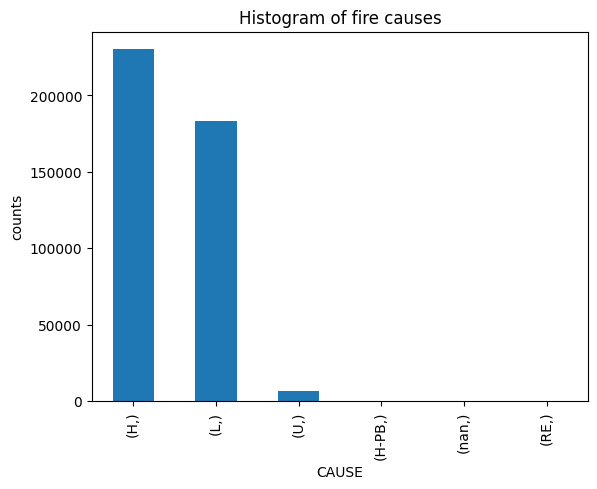

In [452]:
plt.figure()
fires.value_counts(['CAUSE']).plot(kind='bar')
plt.title('Histogram of fire causes')
plt.ylabel('counts')
plt.show()

In this diagram the fire causes are as follows:
- H = Human Caused
- L = Lightning
- U = Unknown
- H-PB = Prescribed Burn (Human Caused)
- RE = Reburn (examine for original cause

Looking at this, since we don't have any information on the fires that have null values in this column, we can just assign them the value 'U' for unknown. 
But let's double check how many null values we have after removing the rows from above:

In [453]:
fires.isna().sum(axis=0)['CAUSE']

0

We don't have any information for CAUSE that is missing after removing the values above. 

We know we don't have any other Null values left to deal with, but let's double check that:

In [454]:
fires.isna().sum(axis=0)

SRC_AGENCY    0
LATITUDE      0
LONGITUDE     0
YEAR          0
MONTH         0
DAY           0
REP_DATE      0
DECADE        0
SIZE_HA       0
CAUSE         0
PROTZONE      0
FIRE_TYPE     0
MORE_INFO     0
SRC_AGY2      0
ECOZONE       0
ECOZ_REF      0
ECOZ_NAME     0
dtype: int64

We can now return to our addressing of the columns that we want to keep or that we need to change.

## 1.4. Investigating the other columns

#### PROTZONE

This is defined as Protection Zone and does not have a national standard. We will have a look at it and see if we can learn anything from this:

In [455]:
fires.value_counts(['PROTZONE'])

PROTZONE             
                         330007
Intensive                 62717
EXT                        4158
Initial Attack             3158
Monitored                  3117
Nordique                   2784
R (High Priority)          2745
FUL                        1568
G (Low Priority)           1327
W (Observation Zone)       1062
nan                        1010
Sustained Action            890
Wilderness FMZ              857
Full Response               776
intensive                   663
MON                         539
Modified Response           364
FullResponse                289
Full FMZ                    278
Critical FMZ                248
Delayed Action              239
Stratigic FMZ               197
Transition FMZ              170
ActionCode: 1               150
Limited Action              148
Y (Moderate Priority)       111
Prescribed Fire             108
Being Monitored              87
nordique                     77
Wilderness (forested)        68
Monitored Response

Looking at this data we see that this isn't very useful as it isn't standardized information. We don't even know what most of these entries mean. So we can remove this columns as well. 

In [456]:
fires = fires.drop(columns = 'PROTZONE')

#### AREA

This column contains the information of how much area was burned in each fire. That's plot this and see the distribution of it.

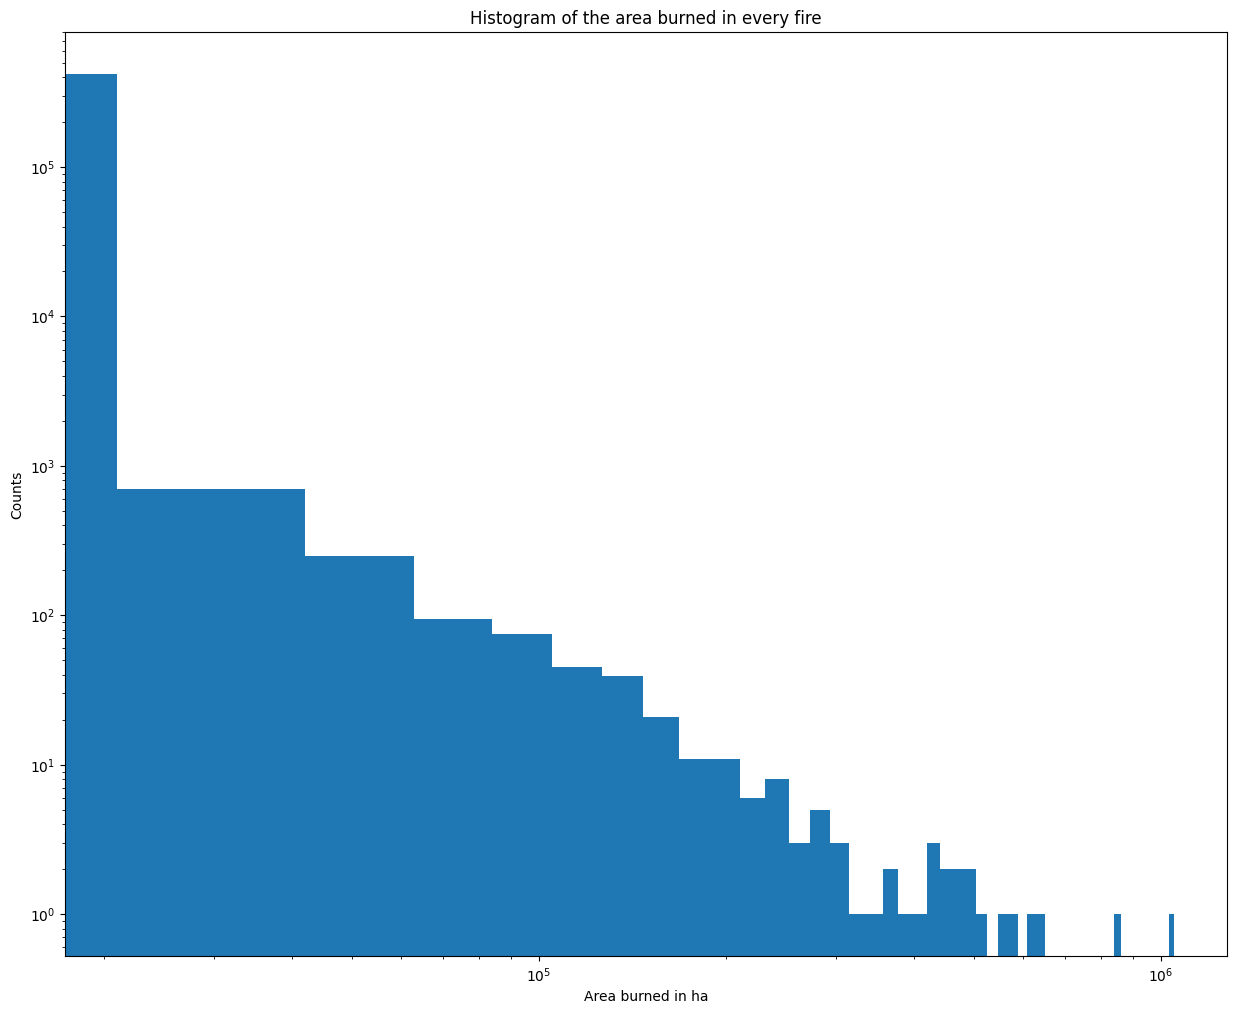

In [457]:
#where are all the fires in BC and AB:
plt.figure(figsize=(15,12))
plt.hist(fires['SIZE_HA'],50)
plt.title('Histogram of the area burned in every fire')
plt.xlabel('Area burned in ha')
plt.ylabel('Counts')
plt.yscale('log')
plt.xscale('log')
plt.show()

Let's also plot the distribution of the area burned versus fire year to see how much area was burned in wildfires over the data range. It is interesting to see how this changes of the years. 

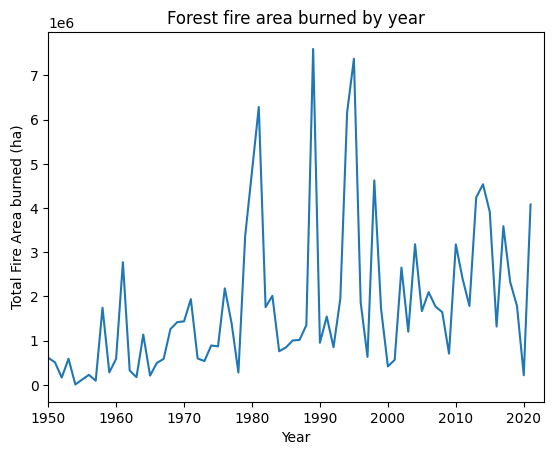

In [458]:
# Distribution of fires by years:
plt.figure()
fires.groupby(fires['YEAR'])['SIZE_HA'].sum().plot()
plt.title('Forest fire area burned by year')
plt.xlabel('Year')
plt.ylabel('Total Fire Area burned (ha)')
plt.xlim(1950,2023)
#plt.title('')
plt. show()

It is interesting to note that the area burned was highest in 1980, 1990 and 1995. Later on we want to replot this for our western canada data set. 

#### SRC_AGENCY

This column tells us which province the fire is happening in. Let's look at the the number of fires per reporting agency. 

In [459]:
fires.value_counts(['SRC_AGENCY'])

SRC_AGENCY
BC            149392
ON             63498
AB             62370
QC             43122
SK             25203
MB             24651
NT             14364
NB             11041
NS             10451
YT              7956
NL              4259
PC-WB           1926
PC-BA            338
PC-JA            238
PC-KO            141
PC-GF            135
PC-GR            135
PC-PA            107
PC-GL            102
PC-RM             90
PC-YO             73
PC-NA             64
PC-WL             63
PC-LM             58
PC-PU             57
PC-RE             42
PC-EI             34
PC-KG             30
PC-PP             25
PC-GI             20
PC-CB             16
PC-TN             15
PC-KE             14
PC-BP             11
PC-TI             10
PC-WP              8
PC-SL              8
PC-BT              7
PC-KL              5
PC-FO              5
PC-PE              4
PC-RE-GL           3
PC-FR              3
PC-SY              3
PC-FU              3
PC-VU              3
PC-LO              2
PC

We see that the most fires in our data are in BC, followed by Ontario and Alberta with similar numbers. As mentioned above, all the PC datapoints are provincial parks and we have to assign them to the correct provinces by hand.  

#### LONGITUDE and LATITUDE

To get an idea of the distribution of fires by Latitude and Longitude, let's plot those two as a pair in a scatter plot. We hopefully see a good even coverage of Canada here. 

In [460]:
fires.value_counts('LATITUDE')

LATITUDE
49.463000    612
49.289000    599
49.010000    588
49.510000    581
49.068000    579
            ... 
52.528583      1
52.528500      1
52.528467      1
46.194200      1
70.000000      1
Name: count, Length: 141554, dtype: int64

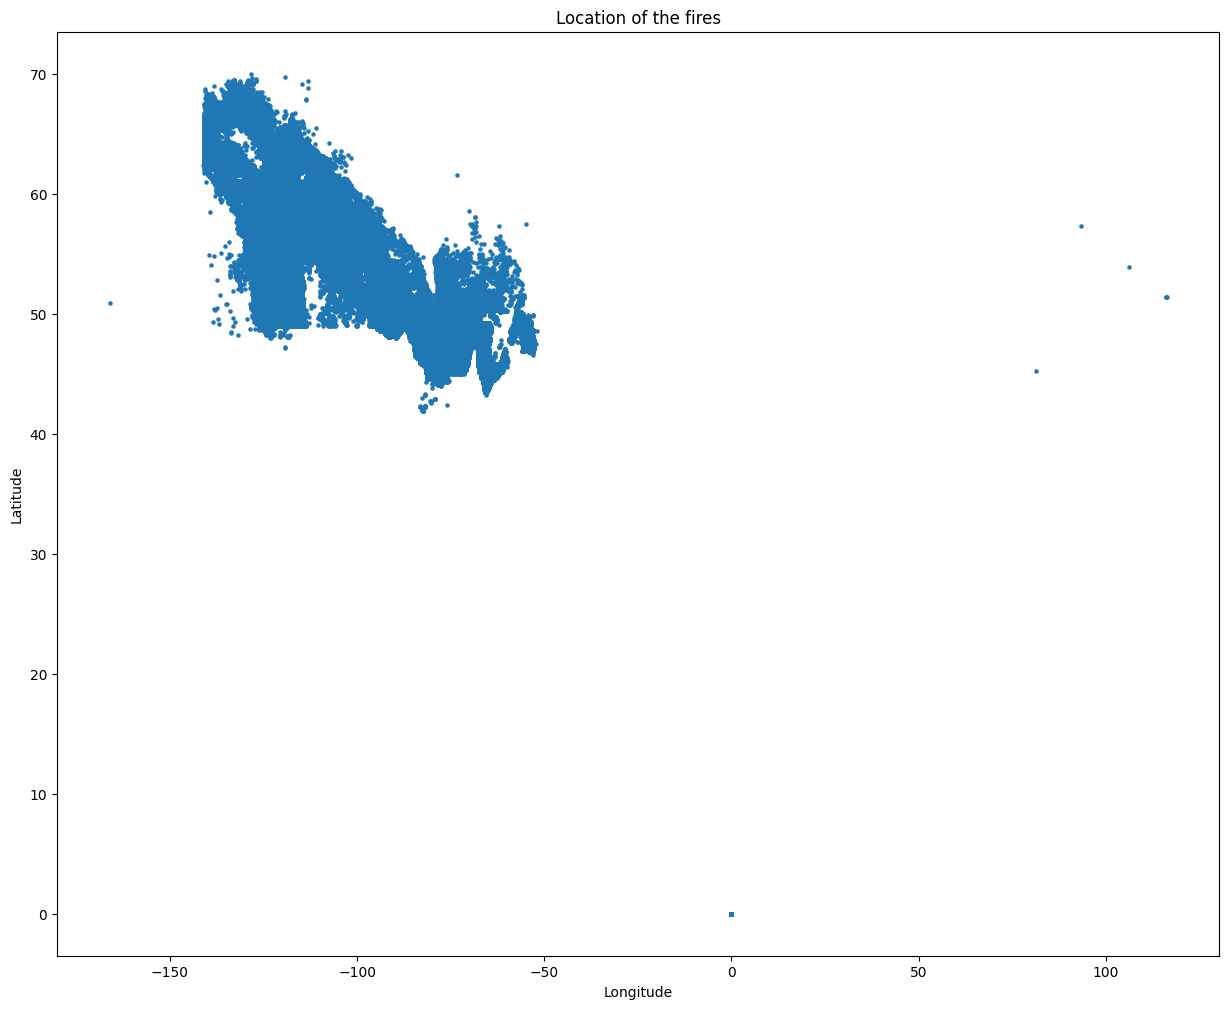

In [461]:
#where are all the fires:
plt.figure(figsize=(15,12))
plt.scatter(fires['LONGITUDE'],fires['LATITUDE'],s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of the fires')
#plt.xlim(-145,-50)
#plt.ylim(40,72)
plt.show()

We see here that we have some fires which have lat/lon values far outside of Canada. For example everything with Longitude > -25 is definitely not in Canada anymore. We need to remove the latitudes and longitudes that don't fit with the coordinates of Canada or are "0". Let's have a look at what the Lat and Lon values are for those points off the map to the right: 

In [462]:
fires[fires.LONGITUDE > -25].value_counts('LATITUDE')

LATITUDE
0.000000     146
45.234360      1
51.387000      1
51.389100      1
51.433300      1
53.919117      1
57.273200      1
Name: count, dtype: int64

So we have a bunch that are 0 and a few others. Let's look at the one > 0 first:

In [463]:
fires[fires.LONGITUDE >= 0].value_counts('SRC_AGENCY')

SRC_AGENCY
PC-BA    50
PC-GR    21
PC-GI    18
PC-JA    17
PC-CB     7
PC-LM     7
PC-BP     5
PC-BT     3
PC-KE     3
PC-WL     2
PC-TN     2
PC-RO     2
PC-KO     2
PC-KL     1
PC-GL     1
PC-LO     1
PC-PA     1
PC-PE     1
PC-PU     1
PC-RM     1
PC-GB     1
PC-SL     1
PC-TI     1
PC-FO     1
PC-EI     1
PC-WP     1
Name: count, dtype: int64

In [464]:
#See where the wrong Lat/Lon values are in the BC fire area
fires[fires.SRC_AGENCY == 'PC-BA'].value_counts('LONGITUDE')

LONGITUDE
 0.0000      47
-115.0000    25
-116.0000    15
-115.5667     5
-115.6000     4
             ..
-115.8522     1
-115.8399     1
-115.8333     1
-115.8302     1
 116.1880     1
Name: count, Length: 229, dtype: int64

In [465]:
fires[fires.SRC_AGENCY == 'PC-BA'].value_counts('LATITUDE')

LATITUDE
0.000000     47
51.000000    22
51.200000     4
51.166700     4
51.183300     3
             ..
51.214100     1
51.217300     1
51.218167     1
51.222000     1
60.000000     1
Name: count, Length: 241, dtype: int64

We see here that we need to fix the 0 Lat and Lon coordinates as well as the ones with the wrong sign. We will impute these values with the mean of the values as they are all very close. 

In [466]:
#Make a list of all the affected areas:
bad_list = ['PC-BA','PC-GR','PC-GI','PC-JA','PC-CB','PC-LM','PC-BP','PC-BT','PC-KE','PC-WL','PC-TN','PC-RO','PC-KO','PC-KL','PC-GL','PC-LO',\
            'PC-PA','PC-PE','PC-PU','PC-RM','PC-GB','PC-SL','PC-TI','PC-FO','PC-EI','PC-WP']

In [467]:
locations = []
meanlats = []
meanlons = []

for name in bad_list:
    location = name 
    meanlon = fires[(fires.SRC_AGENCY == name) & (fires.LONGITUDE < 0)]['LONGITUDE'].mean()
    meanlat = fires[(fires.SRC_AGENCY == name) & (fires.LONGITUDE < 0)]['LATITUDE'].mean()
    locations.append(location)
    meanlats.append(meanlat)
    meanlons.append(meanlon)
    

bad_df = pd.DataFrame({'location':locations,'meanlat':meanlats, 'meanlon':meanlons})


In [468]:
bad_df

,location,meanlat,meanlon
0,PC-BA,51.357673,-115.742092
1,PC-GR,49.188111,-107.268655
2,PC-GI,48.487385,-123.250290
3,PC-JA,52.913054,-118.006648
4,PC-CB,46.625089,-60.420000
5,PC-LM,47.051978,-73.749346
6,PC-BP,45.242550,-81.504917
7,PC-BT,52.670850,-106.137425
8,PC-KE,44.289127,-65.120927
9,PC-WL,49.095503,-114.033203


In [469]:
for i in range(0,len(bad_list)):
    fires['LATITUDE'].loc[(fires['LONGITUDE'] >= 0) & (fires['SRC_AGENCY']== bad_list[i])] = bad_df['meanlat'][i]
    fires['LONGITUDE'].loc[(fires['LONGITUDE'] >= 0) & (fires['SRC_AGENCY']== bad_list[i])] = bad_df['meanlon'][i]

In [470]:
fires[fires.LONGITUDE >= 0].value_counts('SRC_AGENCY')

Series([], Name: count, dtype: int64)

Let's replot our fire locations now with those data points removed.

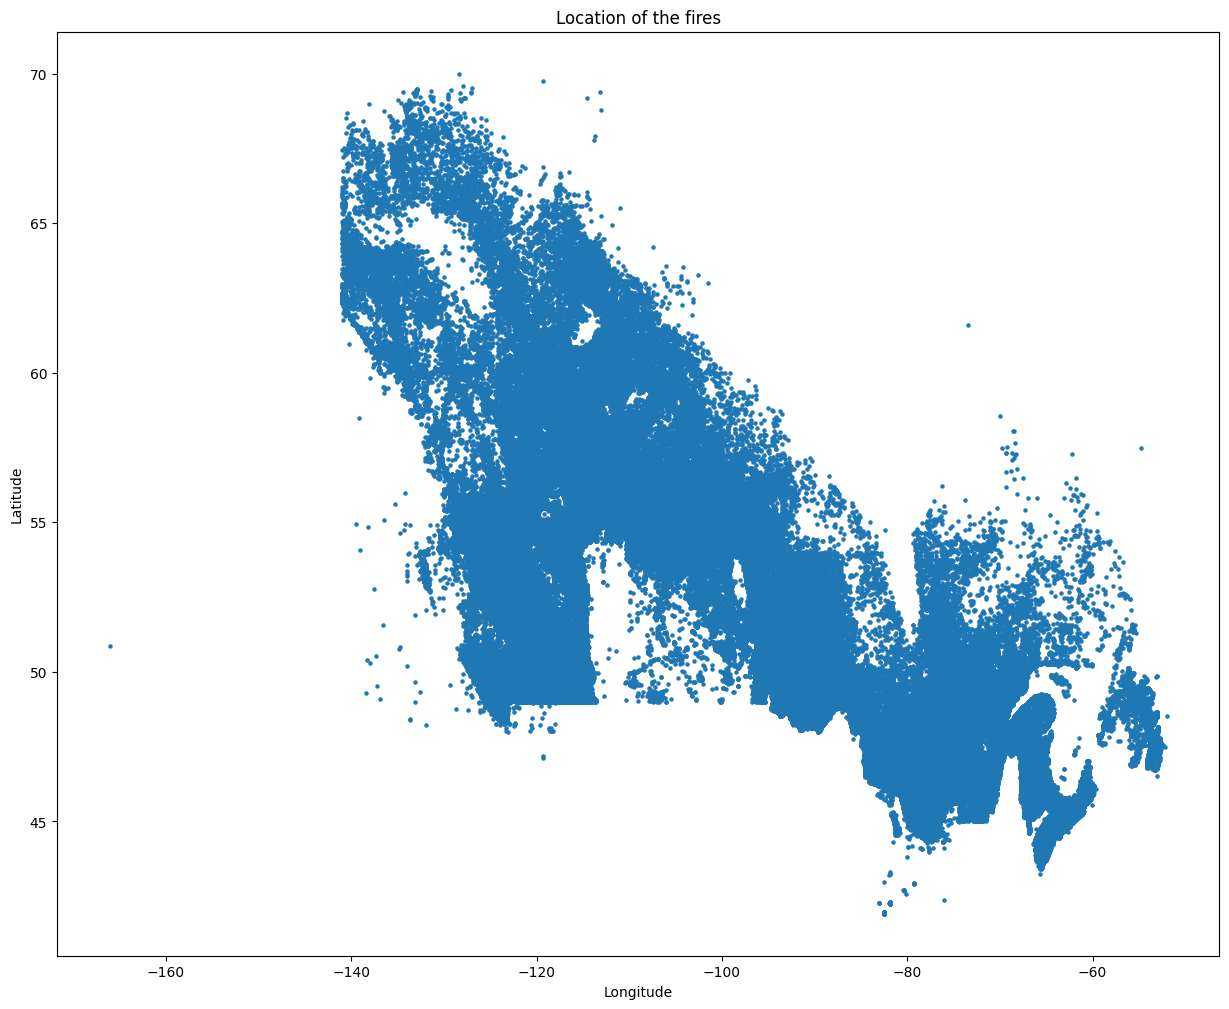

In [471]:
#where are all the fires:
plt.figure(figsize=(15,12))
plt.scatter(fires['LONGITUDE'],fires['LATITUDE'],s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of the fires')
plt.show()

We see here now we have one more data point that is way off into the Pacific and we will deal with this one too. 

In [472]:
fires[fires.LONGITUDE <-145].value_counts('SRC_AGENCY')

SRC_AGENCY
PC-KO    1
Name: count, dtype: int64

We see here that this data point is also not right, so we need to fix this as well:

In [473]:
meanlon_KO  = fires[(fires.SRC_AGENCY == 'PC-KO') & (fires.LONGITUDE > -145)]['LONGITUDE'].mean()
meanlat_KO  = fires[(fires.SRC_AGENCY == 'PC-KO') & (fires.LONGITUDE > -145)]['LATITUDE'].mean()

In [474]:
fires['LATITUDE'].loc[(fires['LONGITUDE'] < -145) & (fires['SRC_AGENCY']== 'PC-KO')] = meanlat_KO
fires['LONGITUDE'].loc[(fires['LONGITUDE'] < -145) & (fires['SRC_AGENCY']== 'PC-KO')] = meanlon_KO

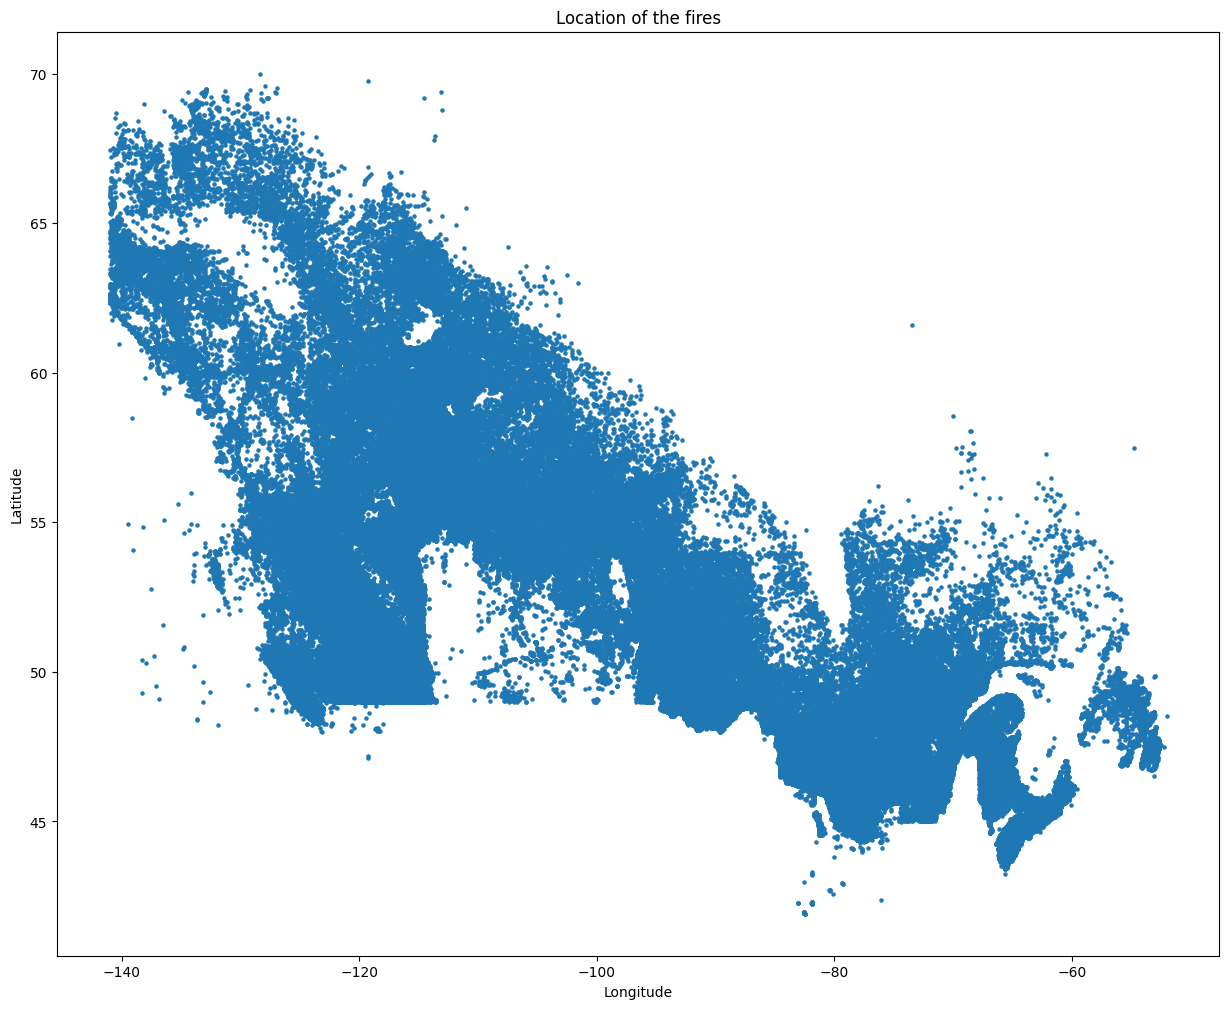

In [475]:
#where are all the fires:
plt.figure(figsize=(15,12))
plt.scatter(fires['LONGITUDE'],fires['LATITUDE'],s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of the fires')
plt.show()

There are still a few data points here that don't fit within the map of canada, for example everything off the coast of BC that is outside of Vancouver island and Haida Gwaii. That would be points with a Latitude < 52 and Longitude < -130. Let's see where these are.

In [476]:
fires[(fires.LONGITUDE <-130) & (fires.LATITUDE < 52)].value_counts('SRC_AGENCY')

SRC_AGENCY
BC    18
Name: count, dtype: int64

In [477]:
fires[(fires.LONGITUDE <-130) & (fires.LATITUDE < 52)]

,SRC_AGENCY,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,DECADE,SIZE_HA,CAUSE,FIRE_TYPE,MORE_INFO,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME
FID,,,,,,,,,,,,,,,,
56038,BC,51.934,-130.997,1967,4,28,1967-04-28,1960-1969,6.4,H,Fire,,BC,0,13,Pacific Maritime
147025,BC,48.402,-133.638,1987,7,11,1987-07-11,1980-1989,0.5,H,Fire,,BC,0,,
147026,BC,48.438,-133.664,1987,9,28,1987-09-28,1980-1989,0.0,H,Fire,,BC,0,,
147028,BC,51.580,-136.526,1987,7,17,1987-07-17,1980-1989,300.0,L,Fire,,BC,0,,
147030,BC,48.223,-131.920,1987,7,10,1987-07-10,1980-1989,0.1,H,Fire,,BC,0,,
147043,BC,49.652,-133.146,1989,6,4,1989-06-04,1980-1989,0.1,H,Fire,,BC,0,,
147045,BC,49.527,-137.163,1987,9,18,1987-09-18,1980-1989,3.5,H,Fire,,BC,0,,
147047,BC,50.393,-138.329,1987,7,7,1987-07-07,1980-1989,0.1,H,Fire,,BC,0,,
147049,BC,50.518,-137.271,1988,7,31,1988-07-31,1980-1989,0.2,L,Fire,,BC,0,,


These are 18 data points and we will leave these for now and maybe come back to them later if it turns into an issue. 

Lastly for this column let's look at a histogram of the Latitudes and Longitudes of the fires we have.

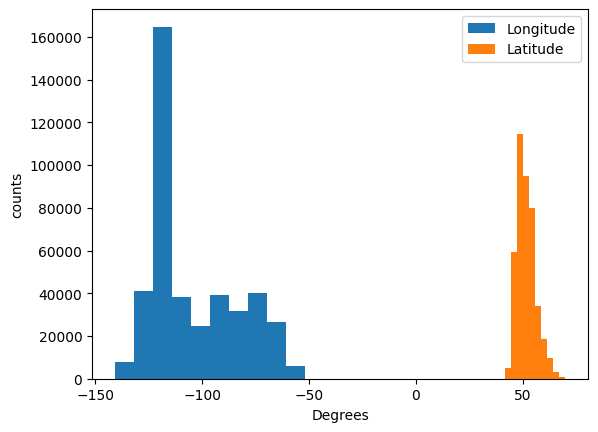

In [478]:
plt.figure()
plt.hist(fires['LONGITUDE'], label = 'Longitude')
plt.hist(fires['LATITUDE'], label = 'Latitude')
plt.legend()
plt.xlabel('Degrees')
plt.ylabel('counts')
plt.show()

As expected, the longitude has a wider spread than the latitude simply because Canada is wider that it is tall.

#### ECOZONE

It might be nice to know what ecozone the fires are in which gives us an indication to the vegetation and climate.

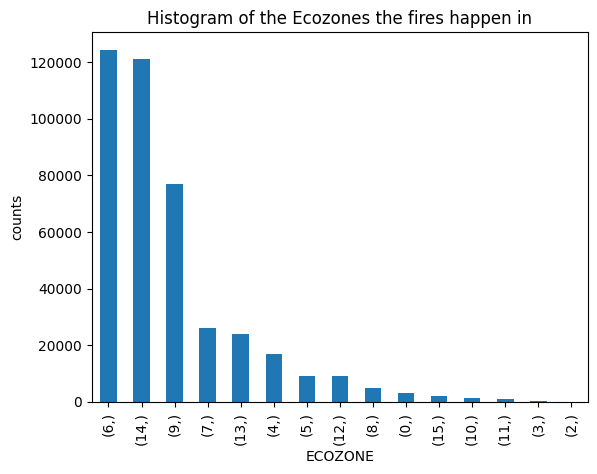

In [479]:
plt.figure()
fires.value_counts(['ECOZONE']).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('ECOZONE')
plt.title('Histogram of the Ecozones the fires happen in')
plt.show()

We do have the name of the ECOZONE, so we can look at that instead to understand what this means better. For our modeling we will remember to remove this column from the dataframe as we have all the information in the ECOZONE number above

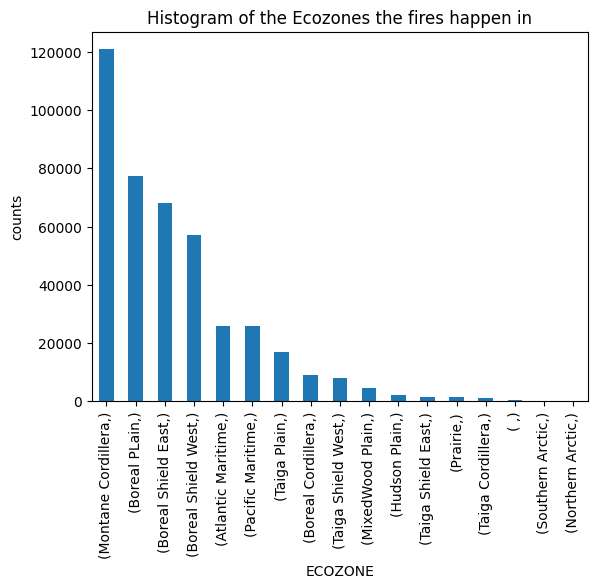

In [480]:
plt.figure()
fires.value_counts(['ECOZ_NAME']).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('ECOZONE')
plt.title('Histogram of the Ecozones the fires happen in')
plt.show()

## 1.5 Dataframe for fires in western Canada

We now have all the information we need on the columns and we can go ahead and filter this fire dataframe for western Canada. So in this new dataframe we include BC, Alberta, the Yukon and the Northwest Territories (SRC_AGENCY = BC, AB, NT and YT).

In [481]:
fires_west = fires.loc[(fires['SRC_AGENCY']=='BC') | (fires['SRC_AGENCY']=='AB') | (fires['SRC_AGENCY']=='YT') | (fires['SRC_AGENCY']=='NT')]

In [482]:
fires_west['SRC_AGENCY'].value_counts()

SRC_AGENCY
BC    149392
AB     62370
NT     14364
YT      7956
Name: count, dtype: int64

If we take this dataframe we can again have a look at where these fires are now located in western Canada and what that distribution looks like on a map. 

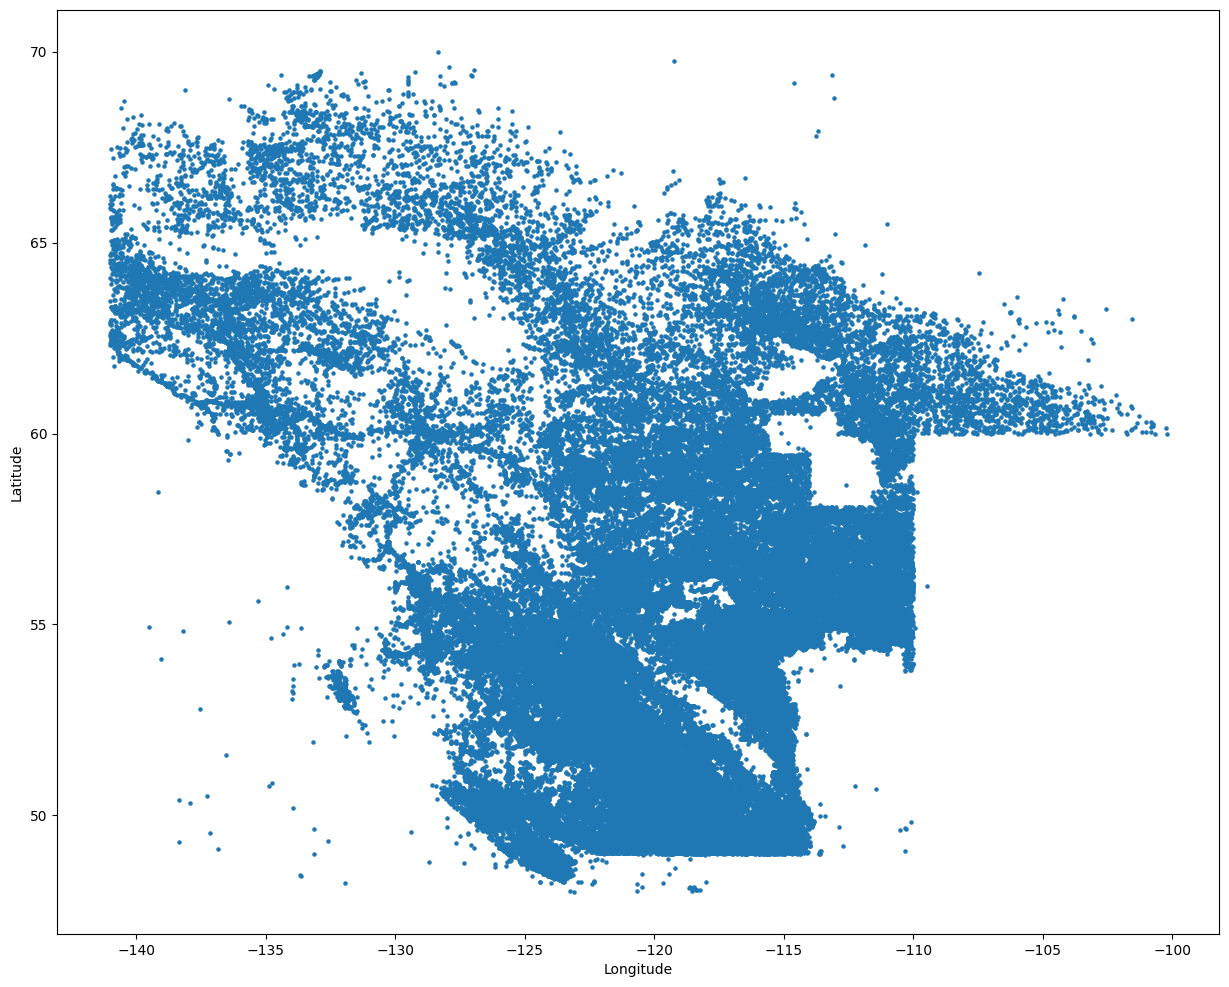

In [483]:
#where are all the fires in the west:
plt.figure(figsize=(15,12))
plt.scatter(fires_west['LONGITUDE'],fires_west['LATITUDE'],s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

From this map we can see that we are missing some values here which must be corresponding to the fires in our national parks. We can not forget about the national parks that are in the west, in BC, AB, the Yukon and the NW Territories. So we need to add that data. To do this we need to look up which national parks are in western Canada and add them by hand: 

In [484]:
# Correct dataframe with all the provinces and territories as well as the national parks in the area:
fires_west = fires.loc[(fires['SRC_AGENCY']=='BC') | (fires['SRC_AGENCY']=='AB') | (fires['SRC_AGENCY']=='YT') | (fires['SRC_AGENCY']=='NT') \
                      | (fires['SRC_AGENCY']=='PC-CT') | (fires['SRC_AGENCY']=='PC-EI') | (fires['SRC_AGENCY']=='PC-FR')  \
                    | (fires['SRC_AGENCY']=='PC-GF') | (fires['SRC_AGENCY']=='PC-GH') | (fires['SRC_AGENCY']=='PC-JA') | (fires['SRC_AGENCY']=='PC-KL')  \
                    | (fires['SRC_AGENCY']=='PC-KO') | (fires['SRC_AGENCY']=='PC-LL') | (fires['SRC_AGENCY']=='PC-NA') | (fires['SRC_AGENCY']=='PC-PR')  \
                    | (fires['SRC_AGENCY']=='PC-RE') | (fires['SRC_AGENCY']=='PC-RO') | (fires['SRC_AGENCY']=='PC-SY') | (fires['SRC_AGENCY']=='PC-VU')  \
                    | (fires['SRC_AGENCY']=='PC-WB') | (fires['SRC_AGENCY']=='PC-WL') | (fires['SRC_AGENCY']=='PC-YO') ] 

So we can replot the distribution of fires now that we have all the parks included to end up with the final distribution of fires. 

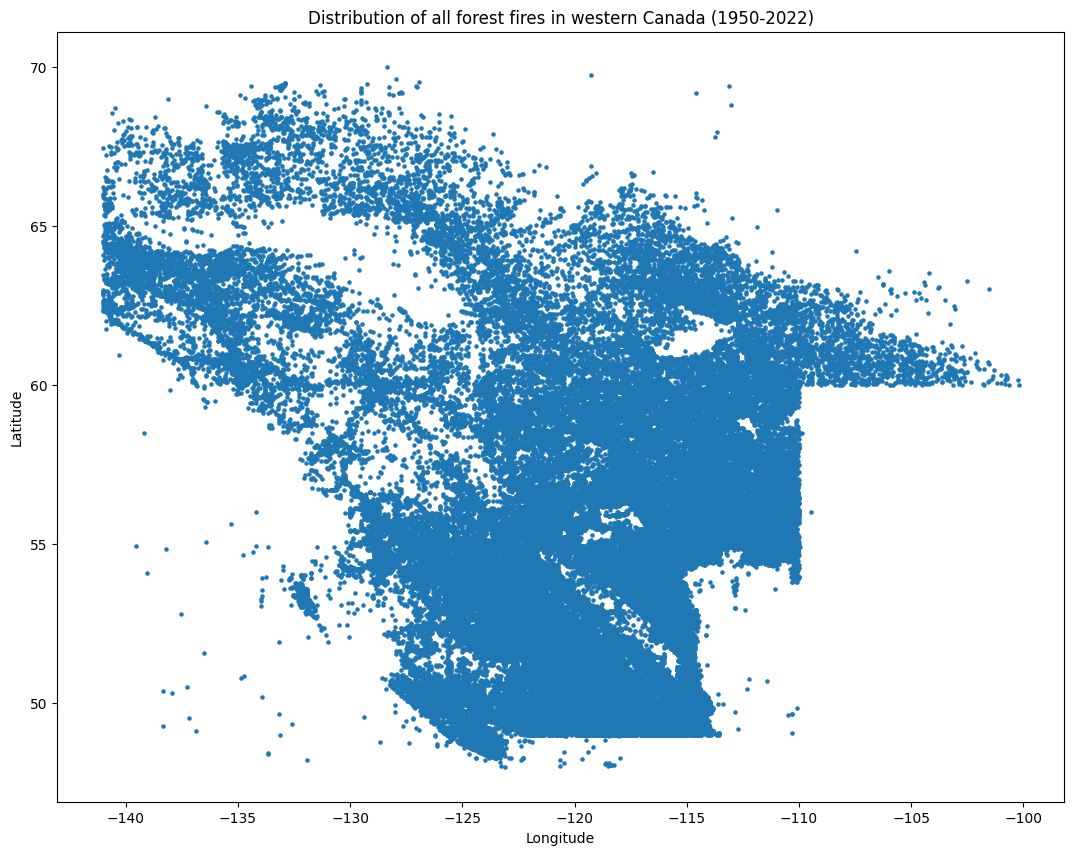

In [485]:
#where are all the fires in the west:
plt.figure(figsize=(13,10))
plt.scatter(fires_west['LONGITUDE'],fires_west['LATITUDE'],s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of all forest fires in western Canada (1950-2022)')
#plt.xlim(-145,-50)
#plt.ylim(40,72)
plt.savefig('fire_map.jpg')
plt.show()

In this map we can now see some of the previously blank areas filled in with data points, which is why we are looking for. 
We can save this dataframe to file so we don't need to do the steps above all over again. 

In [486]:
fires_west.to_csv("data/fires_west.csv")

# 2. Weather Data

We have downloaded data for all weather stations in BC, AB, the Yukon and the North West Territories in operation from 1950 to today. We downloaded this from this website: https://climate-change.canada.ca/climate-data/#/monthly-climate-summaries
This data was downloaded in multiple files, so first we have to combine them all into one dataframe. We can then save this dataframe to a new csv file so we don't have to do the file combination over and over again. 

In [487]:
# Let's write a code to get all the data files into a list or an array
datafiles = []
maxnum = 60
frange = np.arange(0,maxnum,1)

for i in frange:
    filename = 'data/monthly_weather2/climate-monthly ('+ str(i) + ').csv'
    datafiles.append(filename)

In [488]:
#loop through the filenames and open the files and append to weather dataframe
weather_df = pd.DataFrame()
df = pd.DataFrame()

for name in datafiles:
    try:
        f = open(name)
    except FileNotFoundError:
        print(f'file does not exits {name}')
    else:
        df = pd.read_csv(name)
        weather_df = pd.concat([weather_df,df],ignore_index = True)

#Convert this dataframe to a single file
weather_df.to_csv("data/monthly_weather/new_combined_file.csv")  

In [489]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567201 entries, 0 to 567200
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   x                          567201 non-null  float64
 1   y                          567201 non-null  float64
 2   LATITUDE                   567201 non-null  float64
 3   LONGITUDE                  567201 non-null  float64
 4   STATION_NAME               567201 non-null  object 
 5   CLIMATE_IDENTIFIER         567201 non-null  object 
 6   ID                         567201 non-null  object 
 7   LOCAL_DATE                 567201 non-null  object 
 8   LAST_UPDATED               567201 non-null  object 
 9   PROVINCE_CODE              567201 non-null  object 
 10  ENG_PROVINCE_NAME          567201 non-null  object 
 11  FRE_PROVINCE_NAME          567201 non-null  object 
 12  LOCAL_YEAR                 567201 non-null  int64  
 13  LOCAL_MONTH                56

There's a lot of data here and a lot of data with null values. We have 567,201 data points for all the weather locations and then there's a lot of columns with missing values. We know we need to change the date to a datetime format.

In [490]:
weather_df['LOCAL_DATE'] = pd.to_datetime(weather_df['LOCAL_DATE'])

In [491]:
weather_df.head(1)

,x,y,LATITUDE,LONGITUDE,STATION_NAME,CLIMATE_IDENTIFIER,ID,LOCAL_DATE,LAST_UPDATED,PROVINCE_CODE,...,DAYS_WITH_PRECIP_GE_1MM,NORMAL_SNOWFALL,TOTAL_SNOWFALL,DAYS_WITH_VALID_SNOWFALL,SNOW_ON_GROUND_LAST_DAY,NORMAL_SUNSHINE,BRIGHT_SUNSHINE,DAYS_WITH_VALID_SUNSHINE,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS
0,-112.966667,54.283333,54.283,-112.967,ABEE AGDM,3010010,32232.2002.11,2002-11-01,2023-07-18 15:20:46,AB,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,85.8


We see right away that we have lots of information here that we might not need. First of all "x" and "y" are just the Latitude and Longitude information we already see in those columns. So we can delete x and y. We also do not need the french province name, "FRE_PROVINCE_NAME". We're not sure what "ID" will help us with, so we will delete those columns as well. We also aren't interested in when the data was last updated, so we can delete that column too. 

In [492]:
weather_df = weather_df.drop(columns = ['x','y','FRE_PROVINCE_NAME','ID','LAST_UPDATED'])

In [493]:
weather_df.columns

Index(['LATITUDE', 'LONGITUDE', 'STATION_NAME', 'CLIMATE_IDENTIFIER',
       'LOCAL_DATE', 'PROVINCE_CODE', 'ENG_PROVINCE_NAME', 'LOCAL_YEAR',
       'LOCAL_MONTH', 'NORMAL_MEAN_TEMPERATURE', 'MEAN_TEMPERATURE',
       'DAYS_WITH_VALID_MEAN_TEMP', 'MIN_TEMPERATURE',
       'DAYS_WITH_VALID_MIN_TEMP', 'MAX_TEMPERATURE',
       'DAYS_WITH_VALID_MAX_TEMP', 'NORMAL_PRECIPITATION',
       'TOTAL_PRECIPITATION', 'DAYS_WITH_VALID_PRECIP',
       'DAYS_WITH_PRECIP_GE_1MM', 'NORMAL_SNOWFALL', 'TOTAL_SNOWFALL',
       'DAYS_WITH_VALID_SNOWFALL', 'SNOW_ON_GROUND_LAST_DAY',
       'NORMAL_SUNSHINE', 'BRIGHT_SUNSHINE', 'DAYS_WITH_VALID_SUNSHINE',
       'COOLING_DEGREE_DAYS', 'HEATING_DEGREE_DAYS'],
      dtype='object')

We see here that we have province_code, and eng_province_name. Since we have the Latitude and Longitude and we know we are only looking at data in western canada we can delete both these columns.

In [494]:
weather_df = weather_df.drop(columns = ['PROVINCE_CODE','ENG_PROVINCE_NAME'])

We already know that not all weather stations operate from 1950 to 2023. Here's an example:

In [495]:
print(weather_df[weather_df['STATION_NAME']=='ALDER FLATS LO']['LOCAL_DATE'].min())
print(weather_df[weather_df['STATION_NAME']=='ALDER FLATS LO']['LOCAL_DATE'].max())

1952-06-01 00:00:00
1984-09-01 00:00:00


This is something we need to take into consideration when we use this weather data later on. When adding fire data we need to make sure that during the date of the fire, the particular weather station was in operation.

## 2.1 Adressing null values in the weather data

The next step is to address the null values in the weather data, and there are a lot of those. Let's look at the numbers again:

In [496]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567201 entries, 0 to 567200
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LATITUDE                   567201 non-null  float64       
 1   LONGITUDE                  567201 non-null  float64       
 2   STATION_NAME               567201 non-null  object        
 3   CLIMATE_IDENTIFIER         567201 non-null  object        
 4   LOCAL_DATE                 567201 non-null  datetime64[ns]
 5   LOCAL_YEAR                 567201 non-null  int64         
 6   LOCAL_MONTH                567201 non-null  int64         
 7   NORMAL_MEAN_TEMPERATURE    142930 non-null  float64       
 8   MEAN_TEMPERATURE           456176 non-null  float64       
 9   DAYS_WITH_VALID_MEAN_TEMP  566311 non-null  float64       
 10  MIN_TEMPERATURE            458251 non-null  float64       
 11  DAYS_WITH_VALID_MIN_TEMP   566311 non-null  float64 

In [497]:
weather_df.isna().mean()*100

LATITUDE                      0.000000
LONGITUDE                     0.000000
STATION_NAME                  0.000000
CLIMATE_IDENTIFIER            0.000000
LOCAL_DATE                    0.000000
LOCAL_YEAR                    0.000000
LOCAL_MONTH                   0.000000
NORMAL_MEAN_TEMPERATURE      74.800820
MEAN_TEMPERATURE             19.574190
DAYS_WITH_VALID_MEAN_TEMP     0.156911
MIN_TEMPERATURE              19.208358
DAYS_WITH_VALID_MIN_TEMP      0.156911
MAX_TEMPERATURE              19.291750
DAYS_WITH_VALID_MAX_TEMP      0.156911
NORMAL_PRECIPITATION         70.246174
TOTAL_PRECIPITATION           3.405847
DAYS_WITH_VALID_PRECIP        0.156911
DAYS_WITH_PRECIP_GE_1MM       3.405847
NORMAL_SNOWFALL              78.810157
TOTAL_SNOWFALL               13.623742
DAYS_WITH_VALID_SNOWFALL      0.156911
SNOW_ON_GROUND_LAST_DAY      58.007479
NORMAL_SUNSHINE              96.317355
BRIGHT_SUNSHINE              95.558717
DAYS_WITH_VALID_SUNSHINE     83.526298
COOLING_DEGREE_DAYS      

We don't need to keep the normal mean temperature, there's just too many null values (75% of data) and we won't be able to use it.

In [498]:
weather_df = weather_df.drop(columns = ['NORMAL_MEAN_TEMPERATURE'])

We are going to have to deal with the large non values. Whenever there was a null value in the normal mean temperature, there is also the "Days with valid mean temperature"s that is zero or null.

In [499]:
weather_df = weather_df[weather_df['DAYS_WITH_VALID_MEAN_TEMP'] != 0]

We are going to do the same for Days with valid max temperatures, we don't want that to be zero either

In [500]:
weather_df = weather_df[weather_df['DAYS_WITH_VALID_MAX_TEMP'] != 0]

We will also drop any rows of the dataframe where the mean temperature is a null value. 

In [501]:
weather_df = weather_df.dropna(subset=['MEAN_TEMPERATURE'])

In [502]:
weather_df.isna().sum(axis=0)

LATITUDE                          0
LONGITUDE                         0
STATION_NAME                      0
CLIMATE_IDENTIFIER                0
LOCAL_DATE                        0
LOCAL_YEAR                        0
LOCAL_MONTH                       0
MEAN_TEMPERATURE                  0
DAYS_WITH_VALID_MEAN_TEMP         0
MIN_TEMPERATURE                  12
DAYS_WITH_VALID_MIN_TEMP          0
MAX_TEMPERATURE                   0
DAYS_WITH_VALID_MAX_TEMP          0
NORMAL_PRECIPITATION         319686
TOTAL_PRECIPITATION           17798
DAYS_WITH_VALID_PRECIP            0
DAYS_WITH_PRECIP_GE_1MM       17798
NORMAL_SNOWFALL              358111
TOTAL_SNOWFALL                74566
DAYS_WITH_VALID_SNOWFALL          0
SNOW_ON_GROUND_LAST_DAY      250886
NORMAL_SUNSHINE              435615
BRIGHT_SUNSHINE              432125
DAYS_WITH_VALID_SUNSHINE     364781
COOLING_DEGREE_DAYS               0
HEATING_DEGREE_DAYS               0
dtype: int64

Looking at the null values list here again, we can see that the sunshine columns really won't help us out here. They are basically all null values. Same with the Normal Snowfall column. Let's get rid of them. We also don't seem to be getting much information from the Snow on the ground on the last day, so we will delete that column too. 

In [503]:
weather_df = weather_df.drop(columns = ['NORMAL_SNOWFALL','NORMAL_SUNSHINE','BRIGHT_SUNSHINE','DAYS_WITH_VALID_SUNSHINE','SNOW_ON_GROUND_LAST_DAY'])

Then again we see that normal precipitation does not have a lot of values so we will delete that column as well. 

In [504]:
weather_df = weather_df.drop(columns = ['NORMAL_PRECIPITATION'])

In [505]:
weather_df.isna().sum(axis=0)

LATITUDE                         0
LONGITUDE                        0
STATION_NAME                     0
CLIMATE_IDENTIFIER               0
LOCAL_DATE                       0
LOCAL_YEAR                       0
LOCAL_MONTH                      0
MEAN_TEMPERATURE                 0
DAYS_WITH_VALID_MEAN_TEMP        0
MIN_TEMPERATURE                 12
DAYS_WITH_VALID_MIN_TEMP         0
MAX_TEMPERATURE                  0
DAYS_WITH_VALID_MAX_TEMP         0
TOTAL_PRECIPITATION          17798
DAYS_WITH_VALID_PRECIP           0
DAYS_WITH_PRECIP_GE_1MM      17798
TOTAL_SNOWFALL               74566
DAYS_WITH_VALID_SNOWFALL         0
COOLING_DEGREE_DAYS              0
HEATING_DEGREE_DAYS              0
dtype: int64

For the total Snowfall we want to just give that 0 value if the number of days with valid snowfall is zero. So let's impute those values. 

In [506]:
weather_df['TOTAL_SNOWFALL'].fillna(0,inplace=True)

In [507]:
weather_df.isna().sum(axis=0)

LATITUDE                         0
LONGITUDE                        0
STATION_NAME                     0
CLIMATE_IDENTIFIER               0
LOCAL_DATE                       0
LOCAL_YEAR                       0
LOCAL_MONTH                      0
MEAN_TEMPERATURE                 0
DAYS_WITH_VALID_MEAN_TEMP        0
MIN_TEMPERATURE                 12
DAYS_WITH_VALID_MIN_TEMP         0
MAX_TEMPERATURE                  0
DAYS_WITH_VALID_MAX_TEMP         0
TOTAL_PRECIPITATION          17798
DAYS_WITH_VALID_PRECIP           0
DAYS_WITH_PRECIP_GE_1MM      17798
TOTAL_SNOWFALL                   0
DAYS_WITH_VALID_SNOWFALL         0
COOLING_DEGREE_DAYS              0
HEATING_DEGREE_DAYS              0
dtype: int64

Seeing how Days with Precipitaion > 1mm and Total preciptaion have the same null values, makes you wonder if those are the same days. We will fill these rows with a 0 for total precipitation and days with precipitation >= 1mm. 

In [508]:
weather_df['TOTAL_PRECIPITATION'].fillna(0, inplace = True)
weather_df['DAYS_WITH_PRECIP_GE_1MM'].fillna(0, inplace = True)

In [509]:
weather_df.isna().sum(axis=0)

LATITUDE                      0
LONGITUDE                     0
STATION_NAME                  0
CLIMATE_IDENTIFIER            0
LOCAL_DATE                    0
LOCAL_YEAR                    0
LOCAL_MONTH                   0
MEAN_TEMPERATURE              0
DAYS_WITH_VALID_MEAN_TEMP     0
MIN_TEMPERATURE              12
DAYS_WITH_VALID_MIN_TEMP      0
MAX_TEMPERATURE               0
DAYS_WITH_VALID_MAX_TEMP      0
TOTAL_PRECIPITATION           0
DAYS_WITH_VALID_PRECIP        0
DAYS_WITH_PRECIP_GE_1MM       0
TOTAL_SNOWFALL                0
DAYS_WITH_VALID_SNOWFALL      0
COOLING_DEGREE_DAYS           0
HEATING_DEGREE_DAYS           0
dtype: int64

In [510]:
weather_df.reset_index(drop=True, inplace=True)

Finally for the minimum number we are going to replace that with the average of the min temp the month before and the month after. 

In [511]:
for ind in weather_df.index:
    if pd.isnull(weather_df['MIN_TEMPERATURE'][ind]):
        weather_df['MIN_TEMPERATURE'][ind] = (weather_df['MIN_TEMPERATURE'][ind-2] + weather_df['MIN_TEMPERATURE'][ind+2])/2
        print(ind, weather_df['MIN_TEMPERATURE'][ind] ) 

121850 0.5
122984 9.25
122988 2.0
124369 8.25
126943 1.0
126947 6.5
127411 7.75
127416 5.0
127417 0.75
129845 10.25
129846 3.75
138574 5.75


In [512]:
weather_df.isna().sum(axis=0)

LATITUDE                     0
LONGITUDE                    0
STATION_NAME                 0
CLIMATE_IDENTIFIER           0
LOCAL_DATE                   0
LOCAL_YEAR                   0
LOCAL_MONTH                  0
MEAN_TEMPERATURE             0
DAYS_WITH_VALID_MEAN_TEMP    0
MIN_TEMPERATURE              0
DAYS_WITH_VALID_MIN_TEMP     0
MAX_TEMPERATURE              0
DAYS_WITH_VALID_MAX_TEMP     0
TOTAL_PRECIPITATION          0
DAYS_WITH_VALID_PRECIP       0
DAYS_WITH_PRECIP_GE_1MM      0
TOTAL_SNOWFALL               0
DAYS_WITH_VALID_SNOWFALL     0
COOLING_DEGREE_DAYS          0
HEATING_DEGREE_DAYS          0
dtype: int64

Finally our dataframe is free of null values. We now have a weather data frame with 456,141 non null entries. Let's plot them again: 

## 2.2 Weather Data Plots

For now, let's plot a few of the columns we have and see what information this gives us. We also have to think about what we do with null values in this data set. 

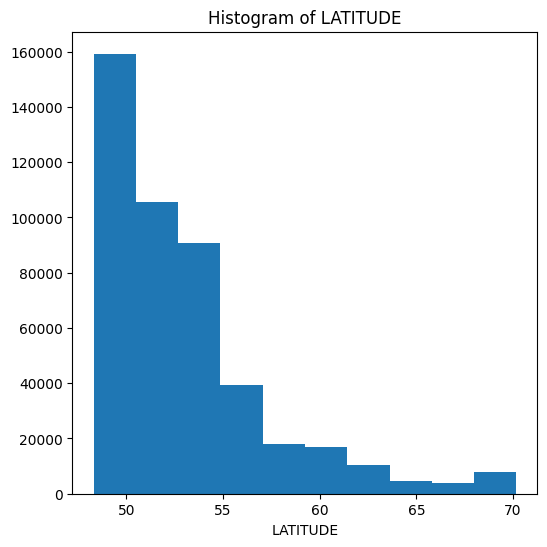

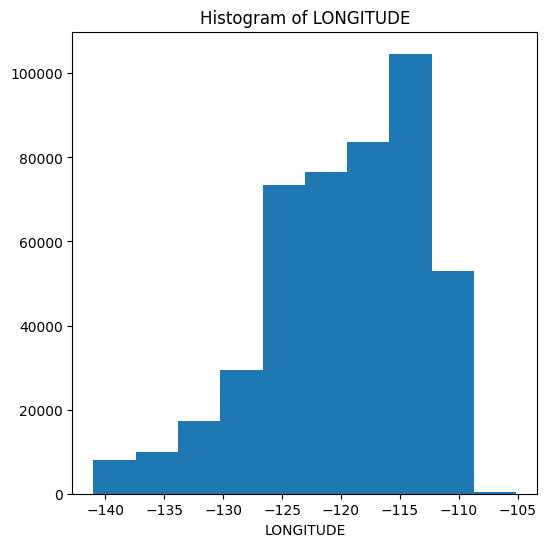

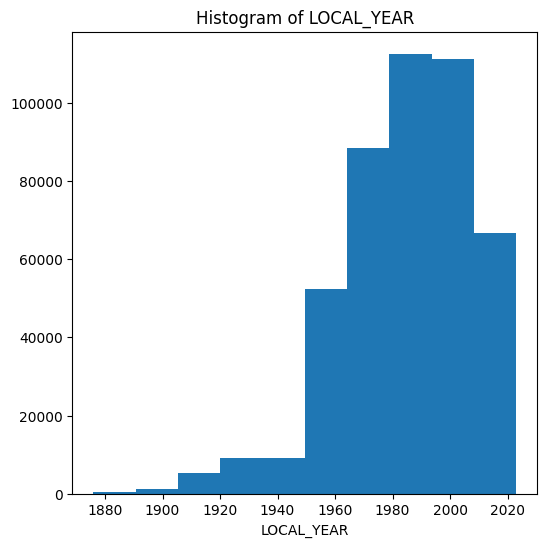

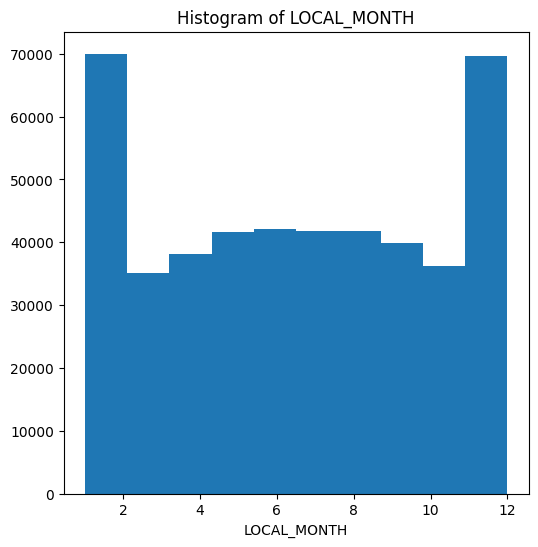

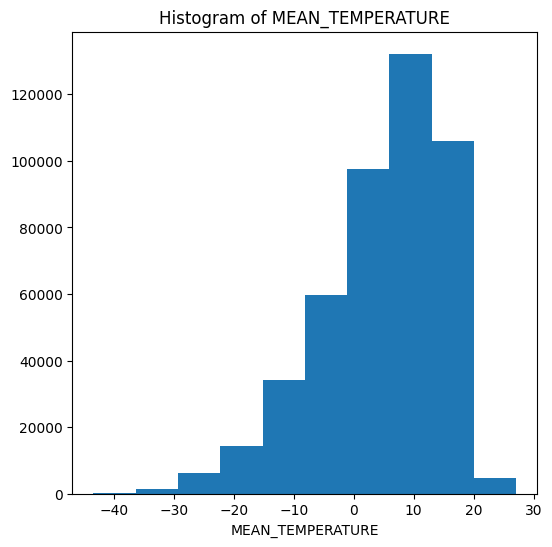

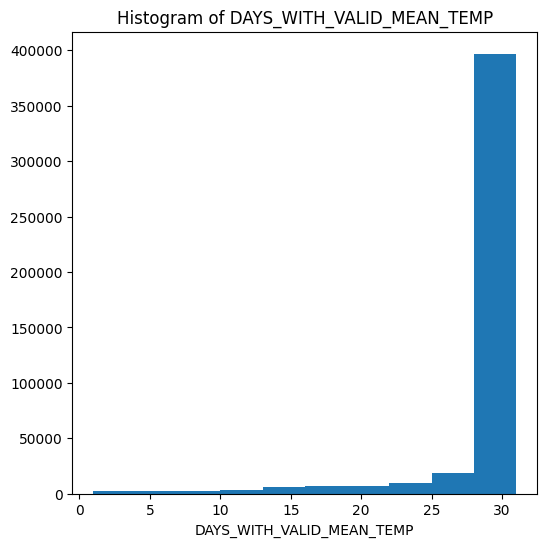

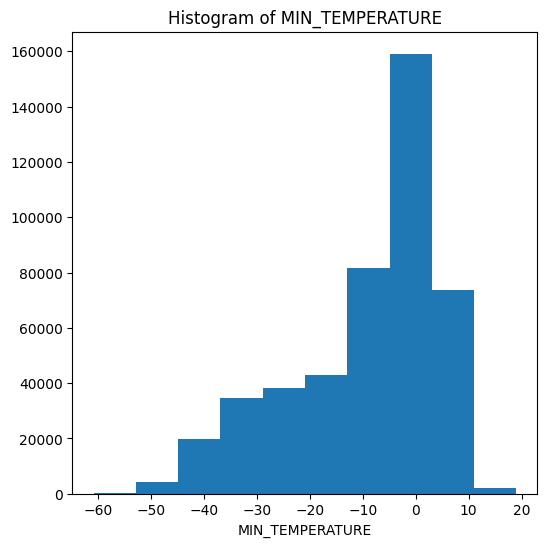

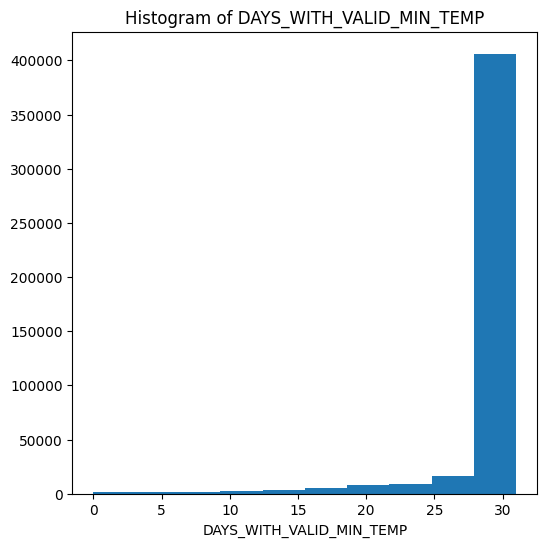

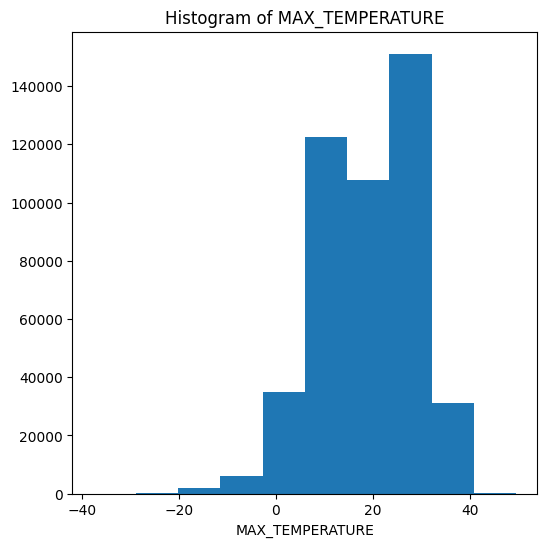

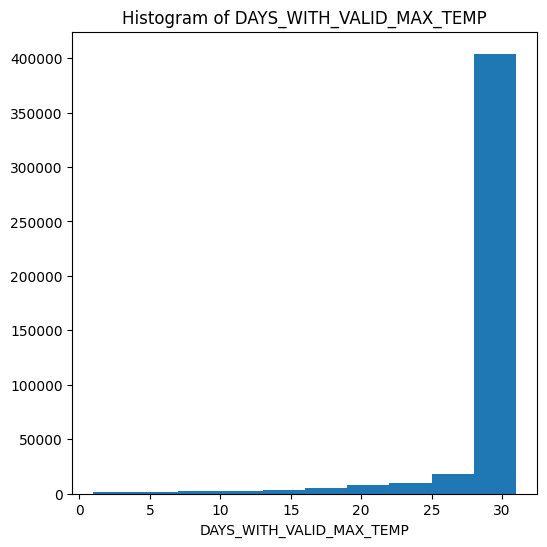

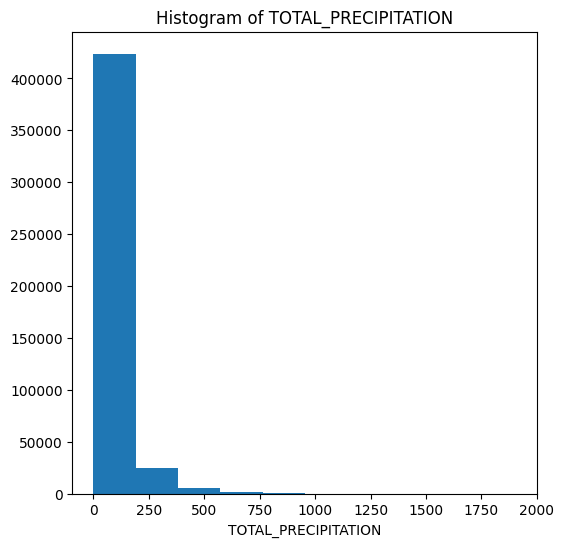

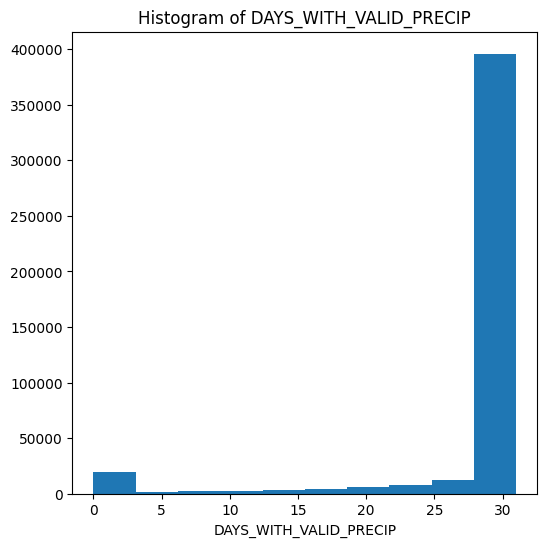

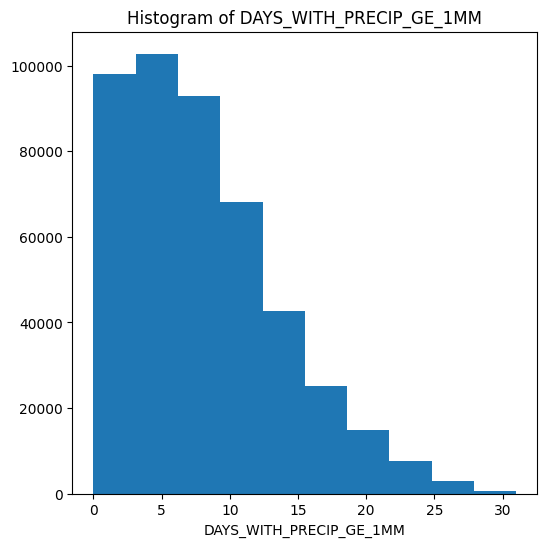

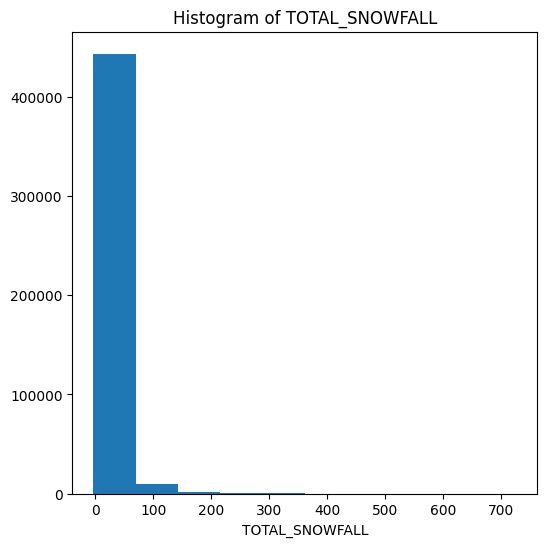

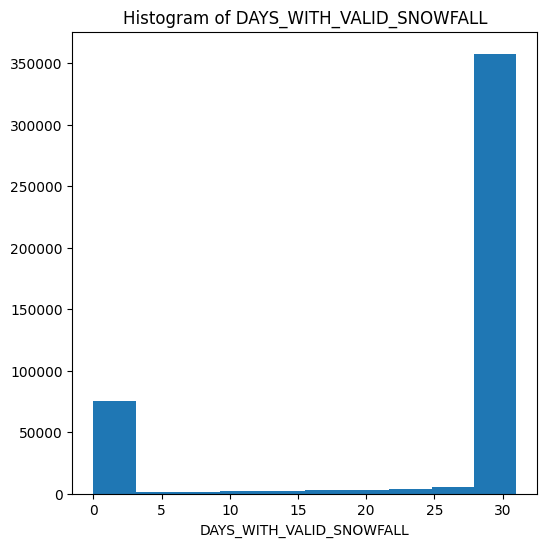

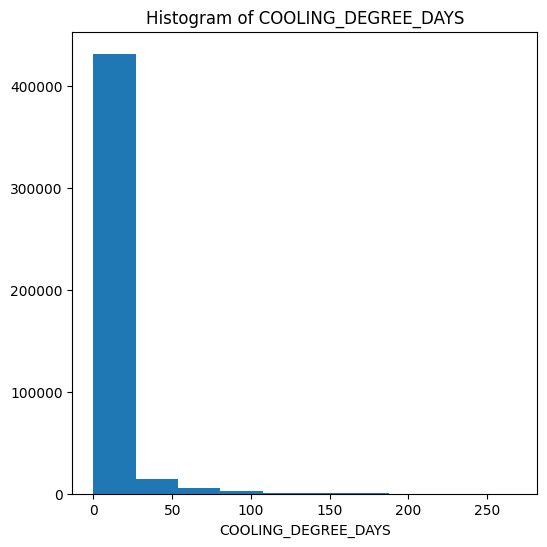

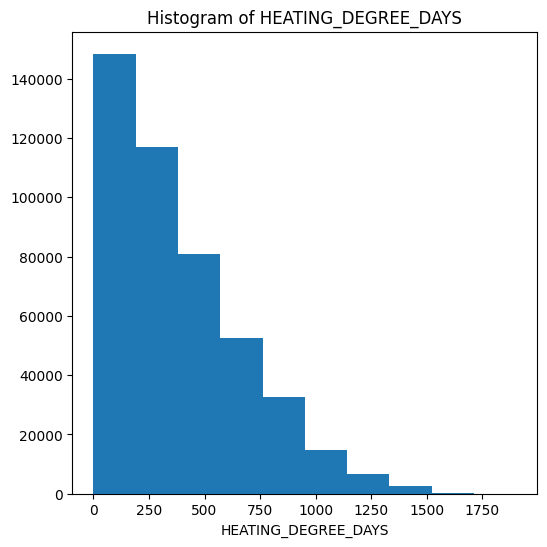

In [513]:
#Plotting all numerical columns

for col in weather_df.select_dtypes('number'): 
    # print(col)
    plt.figure(figsize = (6,6))
    plt.hist(weather_df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.show()

We also need to make sure we have data all the way up to 2023 and that this weather data set does not cut off any earlier than our fire data. 

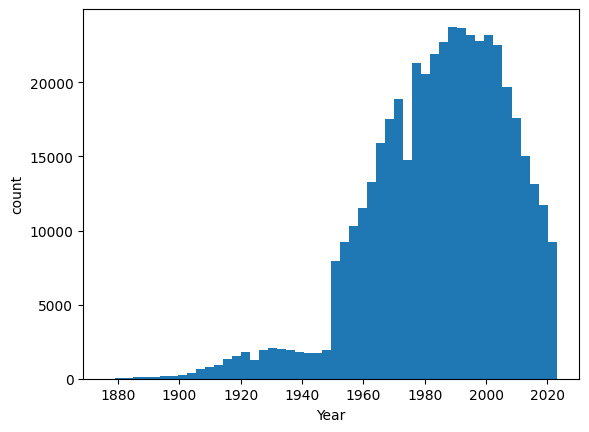

In [514]:
plt.figure()
plt.hist(weather_df['LOCAL_DATE'].dt.year, 50)
plt.xlabel("Year")
plt.ylabel('count')
#plt.xlim(2000,2023)
plt.show()

In our wethaer data we can clearly see that we have the most information for years between 1970 and 2010. Since our fire data starts in 1950 it's good to see that there is a jump in the data in 1950 where we have much more weather data than before 1950.

# 3. Weather Station List

One more thing that we will need for our analysis to work well is a list of all the weather stations in the weather file. This will help us when we are going to find the closest weather station to each fire. We do this with the weather data we just cleaned before. We will use that data frame to find all the unique stations and will then add the year/month that the station first opened and the year/month it closed.

In [515]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456141 entries, 0 to 456140
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LATITUDE                   456141 non-null  float64       
 1   LONGITUDE                  456141 non-null  float64       
 2   STATION_NAME               456141 non-null  object        
 3   CLIMATE_IDENTIFIER         456141 non-null  object        
 4   LOCAL_DATE                 456141 non-null  datetime64[ns]
 5   LOCAL_YEAR                 456141 non-null  int64         
 6   LOCAL_MONTH                456141 non-null  int64         
 7   MEAN_TEMPERATURE           456141 non-null  float64       
 8   DAYS_WITH_VALID_MEAN_TEMP  456141 non-null  float64       
 9   MIN_TEMPERATURE            456141 non-null  float64       
 10  DAYS_WITH_VALID_MIN_TEMP   456141 non-null  float64       
 11  MAX_TEMPERATURE            456141 non-null  float64 

In [516]:
#Unique Station list:

Name = 'None'
Lat = 0.0
Lon = 0.0
NameArray = []
LatArray = []
LonArray = []
ProvArray = []
CidArray = []

for ind in weather_df.index:
   
    Name = weather_df['STATION_NAME'][ind]
      
    if Name in NameArray:
        continue 
    else:
        NameArray.append(weather_df['STATION_NAME'][ind])
        LatArray.append(weather_df['LATITUDE'][ind])
        LonArray.append(weather_df['LONGITUDE'][ind])
        CidArray.append(weather_df['CLIMATE_IDENTIFIER'][ind])
        
        #print(Name)
        
d = {'Name':NameArray, 'Lat':LatArray, 'Lon':LonArray, 'CID' : CidArray}
Station_df = pd.DataFrame(data = d)
Station_df.head(5)

,Name,Lat,Lon,CID
0,ABEE AGDM,54.283,-112.967,3010010
1,ALBERT HALL AGCM,53.113,-111.181,3010060
2,ALDER FLATS LO,52.800,-114.817,3010080
3,ALLIANCE,52.433,-111.783,3010160
4,ALLIANCE AGCM,52.315,-111.779,3010162


Now we add the first opening day/month and closing day/month to this dataframe. 

In [517]:
Station_df['First_Year'] = 0
Station_df['Last_Year'] = 0
Station_df['First_Month'] = 0
Station_df['Last_Month'] = 0

for ind in Station_df.index:
    Name = Station_df['Name'][ind]
    
    YearO = weather_df.loc[weather_df['STATION_NAME'] == Name ]['LOCAL_YEAR'].min()
    YearC = weather_df.loc[weather_df['STATION_NAME'] == Name ]['LOCAL_YEAR'].max()
    
    MonthO = weather_df.loc[(weather_df['STATION_NAME'] == Name) & (weather_df['LOCAL_YEAR'] == YearO) ]['LOCAL_MONTH'].min()
    MonthC = weather_df.loc[(weather_df['STATION_NAME'] == Name) & (weather_df['LOCAL_YEAR'] == YearC) ]['LOCAL_MONTH'].max()

    Station_df['First_Year'][ind] = YearO
    Station_df['Last_Year'][ind] = YearC
    Station_df['First_Month'][ind] = MonthO
    Station_df['Last_Month'][ind] = MonthC
    
Station_df.head()

,Name,Lat,Lon,CID,First_Year,Last_Year,First_Month,Last_Month
0,ABEE AGDM,54.283,-112.967,3010010,2002,2023,11,6
1,ALBERT HALL AGCM,53.113,-111.181,3010060,2007,2023,5,3
2,ALDER FLATS LO,52.800,-114.817,3010080,1952,1984,6,9
3,ALLIANCE,52.433,-111.783,3010160,1916,1982,7,7
4,ALLIANCE AGCM,52.315,-111.779,3010162,2007,2023,5,6


In [518]:
# just to be safe, let's reset the index on this dataframe
Station_df.reset_index(drop=True, inplace=True)
Station_df.head()

,Name,Lat,Lon,CID,First_Year,Last_Year,First_Month,Last_Month
0,ABEE AGDM,54.283,-112.967,3010010,2002,2023,11,6
1,ALBERT HALL AGCM,53.113,-111.181,3010060,2007,2023,5,3
2,ALDER FLATS LO,52.800,-114.817,3010080,1952,1984,6,9
3,ALLIANCE,52.433,-111.783,3010160,1916,1982,7,7
4,ALLIANCE AGCM,52.315,-111.779,3010162,2007,2023,5,6


# 4. ENSO Data

Now it's time to have a look at the El Nino/La Nina or ENSO (El Nino Southern Oscillation data) data. We have a list of ENSO years with more information. We have downloaded this dataset from here: https://ggweather.com/enso/oni.htm 
Let's load it in and have a look.

In [519]:
enso_df = pd.read_csv('elnino/ElNino_LaNina_csv.csv')
enso_df.tail()

,ENSO Type,year,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ
68,WE,2019,0.1,0.2,0.5,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.5,0.5
69,NaN,2020,0.3,0.1,0.2,0.4,0.5,0.6,0.5,0.5,0.4,0.2,-0.1,-0.3
70,ML,2021,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2,-1.1,-0.9,-0.8,-0.7,-0.5,-0.4
71,ML,2022,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9
72,WL,2023,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8,-0.7,-0.4,-0.2,0.1,0.5,NaN


In [520]:
enso_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ENSO Type  51 non-null     object 
 1   year       73 non-null     int64  
 2   JJA        73 non-null     float64
 3   JAS        73 non-null     float64
 4   ASO        73 non-null     float64
 5   SON        73 non-null     float64
 6   OND        73 non-null     float64
 7   NDJ        73 non-null     float64
 8   DJF        73 non-null     float64
 9   JFM        73 non-null     float64
 10  FMA        73 non-null     float64
 11  MAM        73 non-null     float64
 12  AMJ        73 non-null     float64
 13  MJJ        72 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 8.1+ KB


In [521]:
# Check for null values
enso_df.isna().sum(axis=0)

ENSO Type    22
year          0
JJA           0
JAS           0
ASO           0
SON           0
OND           0
NDJ           0
DJF           0
JFM           0
FMA           0
MAM           0
AMJ           0
MJJ           1
dtype: int64

We are not going to worry about the null value in the MJJ column as we are most likely not going to use that information. If we will we will address it then. Lastly since we want to look at the ENSO type we make sure that is a string value.

In [522]:
#Turn the ENSO type into string
enso_df['ENSO Type'] = enso_df['ENSO Type'].astype('str')

We are now going to write a few little functions to turn the ENSO_TYPE column into three columns, an El Nino (E), a La Nina (L) and a noEnso (n) column. We can then write another function to give us a ENSO Strength column (W = weak, M = medium, S = Strong, n = noENSO). 

In [523]:
def assign_elnino(val):
    if pd.notna(val):
        if val.endswith('L'):
            return 0
        elif val.endswith('E'):
            return 1
        else:
            return 0
    return val

def assign_lanina(val):
    if pd.notna(val):
        if val.endswith('E'):
            return 0
        elif val.endswith('L'):
            return 1
        else:
            return 0
    return val

def assign_noEnso(val):
    if pd.notna(val):
        if val.endswith('n'):
            return 1
        else:
            return 0
    else:
        return 1
    return val

In [524]:
enso_df['ElNino'] = enso_df['ENSO Type'].apply(assign_elnino)
enso_df['LaNina'] = enso_df['ENSO Type'].apply(assign_lanina)
enso_df['noEnso']= enso_df['ENSO Type'].apply(assign_noEnso)

In [525]:
enso_df.head()

,ENSO Type,year,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ,ElNino,LaNina,noEnso
0,nan,1951,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6,0,0,1
1,ME,1952,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0,1,0,0
2,WE,1953,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8,1,0,0
3,WE,1954,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5,1,0,0
4,WL,1955,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7,0,1,0


In [526]:
def assign_strength(val):
    if pd.notna(val):
        if val.startswith('W'):
            return "Weak"
        elif val.startswith('M'):
            return 'Medium'
        elif val.startswith('S'):
            return 'Strong'
        else:
            return 'NoENSO'
    return val

In [527]:
enso_df['Strength'] = enso_df['ENSO Type'].apply(assign_strength)

In [528]:
enso_df.head(5)

,ENSO Type,year,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ,ElNino,LaNina,noEnso,Strength
0,nan,1951,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6,0,0,1,NoENSO
1,ME,1952,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0,1,0,0,Medium
2,WE,1953,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8,1,0,0,Weak
3,WE,1954,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5,1,0,0,Weak
4,WL,1955,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7,0,1,0,Weak


Since our fire data starts in 1950, let's add a row for 1950, as we have fires going back to 1950. We know there was no ENSO in 1950, so we just add 0's, noEnso = 1 and Strength "NoENSO". All other values will be set to 0 as we don't think we will need them. 

In [529]:
fifty = pd.DataFrame([['nan', 1950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,'NoENSO']], columns=['ENSO Type','year','JJA','JAS','ASO','SON','OND','NDJ','DJF','JFM','FMA','MAM','AMJ','MJJ','ElNino','LaNina','noEnso','Strength'])
enso_df = pd.concat([fifty, enso_df])

In [530]:
enso_df

,ENSO Type,year,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ,ElNino,LaNina,noEnso,Strength
0,nan,1950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,NoENSO
0,nan,1951,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6,0,0,1,NoENSO
1,ME,1952,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0,1,0,0,Medium
2,WE,1953,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8,1,0,0,Weak
3,WE,1954,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5,1,0,0,Weak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,WE,2019,0.1,0.2,0.5,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.5,0.5,1,0,0,Weak
69,nan,2020,0.3,0.1,0.2,0.4,0.5,0.6,0.5,0.5,0.4,0.2,-0.1,-0.3,0,0,1,NoENSO
70,ML,2021,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2,-1.1,-0.9,-0.8,-0.7,-0.5,-0.4,0,1,0,Medium
71,ML,2022,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,0,1,0,Medium


We are happy with this dataframe and we can use this later to add Enso information to our final data frame. Let's write this to file so we can use it later if we want to.

# 5. Add weather station information to the fire data

We need to add the closest weather station information to our fires_west dataframe. To do this we need to make sure we add the weather station that was the closest to the fire and was in operation at the time of the fire.  

We find that information from our Station_df dataframe. There are two things here to consider. The biggest one is that not a single weather station was in operation all of the years from 1950 to 2022. So to add the closest station, we need to add the closest station in operation at the time. And if we want to use the climate data from the year before, we need to make sure that the weather station was in operation the year before as well. To achieve this, we need to make sure we filter by year and by distance. 

In [531]:
#Reset the index to make sure it's all in order
fires_west.reset_index(drop=True, inplace=True)
fires_west.head()

,SRC_AGENCY,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,DECADE,SIZE_HA,CAUSE,FIRE_TYPE,MORE_INFO,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME
0,BC,59.963,-128.172,1953,5,26,1953-05-26,1950-1959,8.0,H,Fire,,BC,12,12,Boreal Cordillera
1,BC,59.318,-132.172,1950,6,22,1950-06-22,1950-1959,8.0,L,Fire,,BC,12,12,Boreal Cordillera
2,BC,59.876,-131.922,1950,6,4,1950-06-04,1950-1959,12949.9,H,Fire,,BC,12,12,Boreal Cordillera
3,BC,59.760,-132.808,1951,7,15,1951-07-15,1950-1959,241.1,H,Fire,,BC,12,12,Boreal Cordillera
4,BC,59.434,-126.172,1952,6,12,1952-06-12,1950-1959,1.2,H,Fire,,BC,12,12,Boreal Cordillera


Before we find the closest weather station we need to drop the fire data for 1950 as there is no weather data for 1949 so we can not use the 1950 data the same way. We just drop it here and start our fires at 1951:

In [532]:
fires_west.drop(fires_west[fires_west.YEAR < 1951].index, inplace=True)

In [533]:
# Initialize some of our values here
lat = 1
lon = 1

#We use a modified station dataframe to cover the date ranges we need for a given fire
Mod_Stations = pd.DataFrame()

#Initialize the new colum of Nearest Station:
fires_west['NEAREST_STATION'] = 0
fires_west['CLIMATE_ID'] = 0

for ind in fires_west.index:
    #for every row in our data frame we need to initialize the distance and Station Name to be set 
    distance = 1000
    min_distance = 1000
    Station_Name = 'None'
    Station_cid = 0
    
    year = fires_west['REP_DATE'].dt.year[ind]
    month = fires_west['REP_DATE'].dt.month[ind]
    lat = fires_west['LATITUDE'][ind]
    lon = fires_west['LONGITUDE'][ind]
    
    # Here we create a modified Station dataframe that only has the stations in operation during the fire years, for us the year
    # before the fire and the year of the fire. We also make sure the station was in operation during the month of our fire, for 
    # example if the fire was in May, it's possible the station closed in April, we need to make sure that isn't the case
    Mod_Stations = Station_df.loc[(Station_df['First_Year'] < year - 2) & (Station_df['Last_Year'] == year ) & \
                                  (Station_df['First_Month'] < month ) & (Station_df['Last_Month'] > month )  ]
    Mod_Stations.reset_index(drop=True, inplace=True)

    #modified weather df that only has the weather from the local year and month of the fire
    weather_mod = weather_df.loc[(weather_df['LOCAL_YEAR'] == year) & (weather_df['LOCAL_MONTH'] == month)]
    #This is a list of all the weather stations that have data for the year and month of the fire
    wlist = list(weather_mod['STATION_NAME'].unique())

    #Now we go through the Stations list to delete the weather stations that don't have data for the month of the fire (that has been
    # the issue, that the station was operational in the year of the fire but has no data for the month the fire happened.)
    for ind3 in Mod_Stations.index:
        ModName = Mod_Stations['Name'][ind3]    
        if ModName in wlist:
            continue
        else:
            Mod_Stations.drop(ind3,axis=0)

        
    #Now we find the closest station
    for ind2 in Mod_Stations.index:
        Station_lat = Mod_Stations['Lat'][ind2]
        Station_lon = Mod_Stations['Lon'][ind2]
        distance_lat = abs(Station_lat - lat)
        distance_lon = abs(Station_lon - lon)
        
        #Find the actual distance between the fire and the weather station:
        distance = math.sqrt(distance_lat**2 + distance_lon**2)
        
        if distance < min_distance:
            min_distance = distance
            Station_Name = Mod_Stations['Name'][ind2]
            Station_cid = Mod_Stations['CID'][ind2]
        else:
            continue 
    #Assign nearest station to the fires dataframe        
    fires_west['NEAREST_STATION'][ind] = Station_Name
    fires_west['CLIMATE_ID'][ind] = Station_cid
    
    #Counter so we know something is happening
    if (int(ind) % 5000) == 0:
        print(ind)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000


In [534]:
fires_west.head()

,SRC_AGENCY,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,DECADE,SIZE_HA,CAUSE,FIRE_TYPE,MORE_INFO,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,NEAREST_STATION,CLIMATE_ID
0,BC,59.963,-128.172,1953,5,26,1953-05-26,1950-1959,8.0,H,Fire,,BC,12,12,Boreal Cordillera,TRANQUILLE,1168220
3,BC,59.760,-132.808,1951,7,15,1951-07-15,1950-1959,241.1,H,Fire,,BC,12,12,Boreal Cordillera,None,0
4,BC,59.434,-126.172,1952,6,12,1952-06-12,1950-1959,1.2,H,Fire,,BC,12,12,Boreal Cordillera,None,0
5,BC,59.963,-136.502,1951,8,1,1951-08-01,1950-1959,194.2,H,Fire,,BC,12,12,Boreal Cordillera,None,0
6,BC,59.597,-126.728,1952,8,11,1952-08-11,1950-1959,0.6,H,Fire,,BC,12,12,Boreal Cordillera,None,0


We see here that there is issues with our fires at the start of the 50's. This is due to the fact that the weather data is very incomplete during those times. So there might not be a weather station even for 1951-1955 fires that were in operation the month/year of the fire and the year before. This data is very spotty. So we have to make sure to drop the fires where we could not find weather data that satisfied our criteria. 

In [535]:
fires_west = fires_west.drop(fires_west.loc[fires_west['NEAREST_STATION'] =='None'].index)

In [536]:
fires_west.loc[fires_west['NEAREST_STATION'] =='None']

,SRC_AGENCY,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,DECADE,SIZE_HA,CAUSE,FIRE_TYPE,MORE_INFO,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,NEAREST_STATION,CLIMATE_ID


In [537]:
fires_west.reset_index(drop=True, inplace=True)

Let's see if we ended up with any type of Fire that had missing 'Nearest_Station' field:

In [538]:
fires_west.isna().sum(axis=0)

SRC_AGENCY         0
LATITUDE           0
LONGITUDE          0
YEAR               0
MONTH              0
DAY                0
REP_DATE           0
DECADE             0
SIZE_HA            0
CAUSE              0
FIRE_TYPE          0
MORE_INFO          0
SRC_AGY2           0
ECOZONE            0
ECOZ_REF           0
ECOZ_NAME          0
NEAREST_STATION    0
CLIMATE_ID         0
dtype: int64

This is the fire dataframe we need to then add it to the weather data below. We will write this dataframe to file so we can use it more easily in the future without running this whole notebook again.

In [539]:
fires_west.to_csv("data/final_fire_vs2.csv")  

# 6. Add ENSO data to the weather data  

Next we are going to add our ENSO info to the weather data. We are using our weather dataframe as the main dataframe as this way we will have weather data for some months/years that have a fire and some months/years that won't have fires, giving us a dataframe for a binary classification problem to solve. 

In [540]:
#Making sure the indices are all ligned up. 
weather_df.reset_index(drop = True, inplace = True)
fires_west
enso_df.reset_index(drop = True, inplace = True)
enso_df

,ENSO Type,year,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ,ElNino,LaNina,noEnso,Strength
0,nan,1950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,NoENSO
1,nan,1951,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6,0,0,1,NoENSO
2,ME,1952,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0,1,0,0,Medium
3,WE,1953,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8,1,0,0,Weak
4,WE,1954,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5,1,0,0,Weak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,WE,2019,0.1,0.2,0.5,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.5,0.5,1,0,0,Weak
70,nan,2020,0.3,0.1,0.2,0.4,0.5,0.6,0.5,0.5,0.4,0.2,-0.1,-0.3,0,0,1,NoENSO
71,ML,2021,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2,-1.1,-0.9,-0.8,-0.7,-0.5,-0.4,0,1,0,Medium
72,ML,2022,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,0,1,0,Medium


In [541]:
weather_df.head()

,LATITUDE,LONGITUDE,STATION_NAME,CLIMATE_IDENTIFIER,LOCAL_DATE,LOCAL_YEAR,LOCAL_MONTH,MEAN_TEMPERATURE,DAYS_WITH_VALID_MEAN_TEMP,MIN_TEMPERATURE,DAYS_WITH_VALID_MIN_TEMP,MAX_TEMPERATURE,DAYS_WITH_VALID_MAX_TEMP,TOTAL_PRECIPITATION,DAYS_WITH_VALID_PRECIP,DAYS_WITH_PRECIP_GE_1MM,TOTAL_SNOWFALL,DAYS_WITH_VALID_SNOWFALL,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS
0,54.283,-112.967,ABEE AGDM,3010010,2002-11-01,2002,11,0.840000,5.0,-13.2,6.0,8.7,5.0,0.0,6.0,0.0,0.0,0.0,0.0,85.8
1,54.283,-112.967,ABEE AGDM,3010010,2002-12-01,2002,12,-9.422581,31.0,-24.0,31.0,5.7,31.0,2.7,31.0,1.0,0.0,0.0,0.0,850.1
2,54.283,-112.967,ABEE AGDM,3010010,2003-01-01,2003,1,-14.509677,31.0,-40.0,31.0,8.5,31.0,27.6,31.0,9.0,0.0,0.0,0.0,1007.8
3,54.283,-112.967,ABEE AGDM,3010010,2003-02-01,2003,2,-12.350000,28.0,-36.9,28.0,3.9,28.0,22.6,28.0,10.0,0.0,0.0,0.0,849.8
4,54.283,-112.967,ABEE AGDM,3010010,2003-03-01,2003,3,-9.300000,31.0,-41.4,31.0,10.1,31.0,20.6,31.0,5.0,0.0,0.0,0.0,846.3


Now we can combine the ENSO data with the weather data.

In [542]:
#Add ENSO info to weather_df

year = weather_df['LOCAL_YEAR'][0]
ENSO_year = 0
weather_df['ELNINO'] = 0
weather_df['LANINA'] = 0
weather_df['NOENSO'] = 0
weather_df['ENSO_STRENGTH'] = 0

for ind in weather_df.index:
    index = int(ind)
    year = weather_df['LOCAL_YEAR'][index]
    for ind2 in enso_df.index:
        enso_year = enso_df['year'][ind2]
        #print(enso_year)
        if year == enso_year:
            weather_df['ELNINO'][index] = enso_df['ElNino'][ind2]
            weather_df['LANINA'][index] = enso_df['LaNina'][ind2]
            weather_df['NOENSO'][index] = enso_df['noEnso'][ind2]
            weather_df['ENSO_STRENGTH'][index] = enso_df['Strength'][ind2]
            break
        else:
            continue 
    if (int(index) % 5000) == 0:
        print(index)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000


# 7. Add nearest city and information to the weather data

We have data from all cities in Canada with population larger than 1,000 people. We have downloaded this data set from  https://simplemaps.com/data/canada-cities
We will load this data into our dataframe and then pull out the ones in Western Canada.  

In [543]:
cities_df = pd.read_csv('data/Cities/canadacities.csv',sep=',')
cities_df.head(2)

,city,city_ascii,province_id,province_name,lat,lng,population,density,timezone,ranking,postal,id
0,Toronto,Toronto,ON,Ontario,43.7417,-79.3733,5429524.0,4334.4,America/Toronto,1,M5T M5V M5P M5S M5R M5E M5G M5A M5C M5B M5M M5...,1124279679
1,Montréal,Montreal,QC,Quebec,45.5089,-73.5617,3519595.0,3889.0,America/Montreal,1,H1X H1Y H1Z H1P H1R H1S H1T H1V H1W H1H H1J H1...,1124586170


In [544]:
cities_df['province_id'].value_counts()

province_id
QC    639
ON    345
BC    145
MB    127
NB    123
AB    117
SK    111
NL     64
NS     35
NU     14
PE     10
NT      6
YT      2
Name: count, dtype: int64

We know we only need BC, AB, NT and YT cities, so let's pull those out from here.

In [545]:
cities_west = cities_df.loc[(cities_df['province_id']=='BC') | (cities_df['province_id']=='AB') \
                            | (cities_df['province_id']=='YT') | (cities_df['province_id']=='NT')]

In [546]:
cities_west['province_id'].value_counts()

province_id
BC    145
AB    117
NT      6
YT      2
Name: count, dtype: int64

What do we want to add to this fire dataframe from here? Closest city name and distance or just distance? Maybe both and we can always remove it if we need it. Let's slim down the city dataframe some more as we don't need all the columns.

In [547]:
cities_west.reset_index(inplace=True)

In [548]:
cities_west.head()

,index,city,city_ascii,province_id,province_name,lat,lng,population,density,timezone,ranking,postal,id
0,2,Vancouver,Vancouver,BC,British Columbia,49.2500,-123.1000,2264823.0,5492.6,America/Vancouver,1,V6Z V6S V6R V6P V6N V6M V6L V6K V6J V6H V6G V6...,1124825478
1,3,Calgary,Calgary,AB,Alberta,51.0500,-114.0667,1239220.0,1501.1,America/Edmonton,1,T1Y T2H T2K T2J T2L T2N T2A T2C T2B T2E T2G T2...,1124690423
2,4,Edmonton,Edmonton,AB,Alberta,53.5344,-113.4903,1062643.0,1360.9,America/Edmonton,1,T5X T5Y T5Z T5P T5R T5S T5T T5V T5W T5H T5J T5...,1124290735
3,11,Surrey,Surrey,BC,British Columbia,49.1900,-122.8489,517887.0,1636.8,America/Vancouver,2,V4A V4N V4P V3R V3S V3T V3V V3W V3X V3Z,1124001454
4,16,Victoria,Victoria,BC,British Columbia,48.4283,-123.3647,335696.0,4406.3,America/Vancouver,1,V8T V8W V8S V8R V9A V8V,1124147219


There's lots of columns here we don't need, so we will delete them here.

In [549]:
cities_west = cities_west.drop(columns = ['index','city_ascii','province_name','density','timezone','ranking', 'postal','id'])

In [550]:
cities_west.head()

,city,province_id,lat,lng,population
0,Vancouver,BC,49.2500,-123.1000,2264823.0
1,Calgary,AB,51.0500,-114.0667,1239220.0
2,Edmonton,AB,53.5344,-113.4903,1062643.0
3,Surrey,BC,49.1900,-122.8489,517887.0
4,Victoria,BC,48.4283,-123.3647,335696.0


In [551]:
cities_west.rename(columns={'province_id':'Province','lat': 'Latitude', 'lng': 'Longitude'}, inplace = True)

In [552]:
cities_west.head()

,city,Province,Latitude,Longitude,population
0,Vancouver,BC,49.2500,-123.1000,2264823.0
1,Calgary,AB,51.0500,-114.0667,1239220.0
2,Edmonton,AB,53.5344,-113.4903,1062643.0
3,Surrey,BC,49.1900,-122.8489,517887.0
4,Victoria,BC,48.4283,-123.3647,335696.0


In [553]:

# Initialize some of our values here
lat = 0
lon = 0

#Initialize the new colum of Nearest Station:
weather_df['NEAREST_CITY'] = 0
weather_df['CITY_DIST'] = 0
weather_df['CITY_POP'] = 0
distance_lat = 200.0
distance_lon = 200.0

for ind in weather_df.index:
    #for every row in our data frame we need to initialize the distance and Station Name to be set 
    distance = 200.0
    min_distance = 200.0
    City_Name = 'None'
    
    lat = weather_df['LATITUDE'][ind]
    lon = weather_df['LONGITUDE'][ind]
    
   
    for ind2 in cities_west.index:
        City_lat = cities_west['Latitude'][ind2]
        City_lon = cities_west['Longitude'][ind2]
        distance_lat = abs(City_lat - lat)
        distance_lon = abs(City_lon - lon)
        
        #Find the actual distance between the fire and the weather station:
        distance = math.sqrt(distance_lat**2 + distance_lon**2)
        
        if distance < min_distance:
            min_distance = distance
            City_Name = cities_west['city'][ind2]
            City_pop = cities_west['population'][ind2]
        else:
            continue 
    #Assign nearest station to the fires dataframe        
    weather_df['NEAREST_CITY'][ind] = City_Name
    weather_df['CITY_DIST'][ind] = min_distance
    weather_df['CITY_POP'][ind] = City_pop
    #Counter so we know something is happening
    if (int(ind) % 5000) == 0:
        print(ind)

# Check that it looks good
weather_df.head()

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000


,LATITUDE,LONGITUDE,STATION_NAME,CLIMATE_IDENTIFIER,LOCAL_DATE,LOCAL_YEAR,LOCAL_MONTH,MEAN_TEMPERATURE,DAYS_WITH_VALID_MEAN_TEMP,MIN_TEMPERATURE,...,DAYS_WITH_VALID_SNOWFALL,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS,ELNINO,LANINA,NOENSO,ENSO_STRENGTH,NEAREST_CITY,CITY_DIST,CITY_POP
0,54.283,-112.967,ABEE AGDM,3010010,2002-11-01,2002,11,0.840000,5.0,-13.2,...,0.0,0.0,85.8,0,0,1,NoENSO,Redwater,0.362131,2053
1,54.283,-112.967,ABEE AGDM,3010010,2002-12-01,2002,12,-9.422581,31.0,-24.0,...,0.0,0.0,850.1,0,0,1,NoENSO,Redwater,0.362131,2053
2,54.283,-112.967,ABEE AGDM,3010010,2003-01-01,2003,1,-14.509677,31.0,-40.0,...,0.0,0.0,1007.8,1,0,0,Medium,Redwater,0.362131,2053
3,54.283,-112.967,ABEE AGDM,3010010,2003-02-01,2003,2,-12.350000,28.0,-36.9,...,0.0,0.0,849.8,1,0,0,Medium,Redwater,0.362131,2053
4,54.283,-112.967,ABEE AGDM,3010010,2003-03-01,2003,3,-9.300000,31.0,-41.4,...,0.0,0.0,846.3,1,0,0,Medium,Redwater,0.362131,2053


Write this dataframe to file:

In [554]:
weather_df.to_csv("data/final_weather_vs2.csv")  

# 8. Combining the fire data with the weather data.
We are now going to be adding the forest fire data to the weather data frame: We are going to right join the fire data onto the weather data and see if we can create a dataframe that has weather and place and fire/no fire and we can do some modeling on that. We will right join on Station Name, year and month to make sure we only join the fire on the specific weather station and the month/year that the fire happened. 

In [555]:
fires_west = fires_west.rename(columns={"NEAREST_STATION": "STATION_NAME"})

As we are going with binary classification models here, there are some columns in the fires dataframe that we are not going to need. 

In [556]:
fires_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225701 entries, 0 to 225700
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   SRC_AGENCY    225701 non-null  object        
 1   LATITUDE      225701 non-null  float64       
 2   LONGITUDE     225701 non-null  float64       
 3   YEAR          225701 non-null  int32         
 4   MONTH         225701 non-null  int32         
 5   DAY           225701 non-null  int32         
 6   REP_DATE      225701 non-null  datetime64[ns]
 7   DECADE        225701 non-null  object        
 8   SIZE_HA       225701 non-null  float64       
 9   CAUSE         225701 non-null  object        
 10  FIRE_TYPE     225701 non-null  object        
 11  MORE_INFO     225701 non-null  object        
 12  SRC_AGY2      225701 non-null  object        
 13  ECOZONE       225701 non-null  int32         
 14  ECOZ_REF      225701 non-null  object        
 15  ECOZ_NAME     225

Looking at this we can remove decade, more info and src_agy2. Also we can delete Protzone, made_date, Day_repDate and Ecoz_ref.

In [557]:
fires_west = fires_west.drop(columns = ['DECADE','MORE_INFO','SRC_AGY2','ECOZ_REF'])

In [558]:
# Safe the dataframes before we go ahead and combine them, just in case we mess this up
fires_west.to_csv("data/fires_west_load.csv")  
weather_df.to_csv("data/weather_toload.csv")

In [559]:
#Here we load them back if we need to because we messup below
#fires_west = pd.read_csv('data/fires_west_load.csv')
#weather_df = pd.read_csv('data/weather_toload.csv')

In [560]:
# Rename fires_west as fires dataframe as we don't need to distinguish anymore
fires = fires_west

One more thing we can do right here is add a column to the fires dataframe that tells us that yes, these are our fire rows. We will call it "FIRE" and give it a 1 for fire events, 0 for no fire events (done after we merge our dataframes). 

In [561]:
#Make sure the fire dataframe has a column fire that indicates that there was a fire
fires['FIRE'] = 1

Now we just need to rename a few columns so we can more easily do our "right join" on these two dataframes. 

In [562]:
fires = fires.rename(columns={"REP_DATE": "LOCAL_DATE"})

In [563]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456141 entries, 0 to 456140
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LATITUDE                   456141 non-null  float64       
 1   LONGITUDE                  456141 non-null  float64       
 2   STATION_NAME               456141 non-null  object        
 3   CLIMATE_IDENTIFIER         456141 non-null  object        
 4   LOCAL_DATE                 456141 non-null  datetime64[ns]
 5   LOCAL_YEAR                 456141 non-null  int64         
 6   LOCAL_MONTH                456141 non-null  int64         
 7   MEAN_TEMPERATURE           456141 non-null  float64       
 8   DAYS_WITH_VALID_MEAN_TEMP  456141 non-null  float64       
 9   MIN_TEMPERATURE            456141 non-null  float64       
 10  DAYS_WITH_VALID_MIN_TEMP   456141 non-null  float64       
 11  MAX_TEMPERATURE            456141 non-null  float64 

In [564]:
#to match the fire data we rename Climate Identifier, Local year and local month in the weather df
weather_df = weather_df.rename(columns={"CLIMATE_IDENTIFIER": "CLIMATE_ID"})
weather_df = weather_df.rename(columns={"LOCAL_YEAR": "YEAR"})
weather_df = weather_df.rename(columns={"LOCAL_MONTH": "MONTH"})

Now we are ready to combine the two dataframes, as said before we right join them on Station Name, Year and Month columns.

In [565]:
# Perform a right join based on the "STATION NAME", "year" and "month" column
result = pd.merge(fires, weather_df, on=['STATION_NAME','YEAR','MONTH'], how='right')
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657937 entries, 0 to 657936
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   SRC_AGENCY                 203979 non-null  object        
 1   LATITUDE_x                 203979 non-null  float64       
 2   LONGITUDE_x                203979 non-null  float64       
 3   YEAR                       657937 non-null  int64         
 4   MONTH                      657937 non-null  int64         
 5   DAY                        203979 non-null  float64       
 6   LOCAL_DATE_x               203979 non-null  datetime64[ns]
 7   SIZE_HA                    203979 non-null  float64       
 8   CAUSE                      203979 non-null  object        
 9   FIRE_TYPE                  203979 non-null  object        
 10  ECOZONE                    203979 non-null  float64       
 11  ECOZ_NAME                  203979 non-null  object  

In [566]:
result.head()

,SRC_AGENCY,LATITUDE_x,LONGITUDE_x,YEAR,MONTH,DAY,LOCAL_DATE_x,SIZE_HA,CAUSE,FIRE_TYPE,...,DAYS_WITH_VALID_SNOWFALL,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS,ELNINO,LANINA,NOENSO,ENSO_STRENGTH,NEAREST_CITY,CITY_DIST,CITY_POP
0,NaN,NaN,NaN,2002,11,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,85.8,0,0,1,NoENSO,Redwater,0.362131,2053
1,NaN,NaN,NaN,2002,12,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,850.1,0,0,1,NoENSO,Redwater,0.362131,2053
2,NaN,NaN,NaN,2003,1,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,1007.8,1,0,0,Medium,Redwater,0.362131,2053
3,NaN,NaN,NaN,2003,2,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,849.8,1,0,0,Medium,Redwater,0.362131,2053
4,NaN,NaN,NaN,2003,3,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,846.3,1,0,0,Medium,Redwater,0.362131,2053


In [567]:
# Reset the index
result.reset_index(drop=True, inplace=True)

We are now needing to decide which non numerical columns we are going to keep in the new dataframe as we need to fill in the null values for our non- fire events (the rows in the weather data frame that could not be assigned to a fire). 

To start with, SRC_AGENCY for non fire events where it is 'NaN' would is the Province Code from the weather dataframe, but we deleted that column already. As we have the location of the fires and weather stations by latitude and longitude,we can just remove that column from the results dataframe. 

In [568]:
# drop SRC AGENCY
result = result.drop(columns = 'SRC_AGENCY')
#result['SRC_AGENCY'].fillna(result['PROVINCE_CODE'], inplace=True)

For latitude and longitude of the fire, we can replace that with the latitude and longitude of the station. We should also rename "LATITUDE/LONGITUDE_x" with "LATITUDE/LONGITUDE_FIRE".

In [569]:
result = result.rename(columns={"LATITUDE_x": "LATITUDE_FIRE", "LONGITUDE_x": "LONGITUDE_FIRE", "LATITUDE_y" : "LATITUDE_STATION", "LONGITUDE_y":"LONGITUDE_STATION"})

In [570]:
result['LATITUDE_FIRE'].fillna(result['LATITUDE_STATION'], inplace=True)
result['LONGITUDE_FIRE'].fillna(result['LONGITUDE_STATION'], inplace=True)

We can not really fill the day with anything as there wasn't a fire any day of the month, so we can just default it to 1. Then we can fill the local date with the made date from year, month and day. Again, we should rename this column to "FIRE_DATE".

In [571]:
result = result.rename(columns={"LOCAL_DATE_x": "FIRE_DATE"})
result['DAY'].fillna(1, inplace=True)
result['FIRE_DATE'].fillna(pd.to_datetime(result[['YEAR', 'MONTH', 'DAY']]), inplace=True)

For the day we could use a random number between 0 and 32 instead of 1 to make the day more usable, but since we have monthly weather data we don't think we will be using the day anyways, so we will leave it at "1".

In [572]:
#Don't use this but leave it for later
# Define a function to replace NaN values with random numbers between 0 and 31
#def replace_nan_with_random(x):
 #   if pd.isna(x):
  #      return np.random.randint(0, 32)  # Generates a random integer between 0 and 31
   # else:
    #return x

For size_ha, cause and fire_type, we can set these to '0' and "None" respectively.

In [573]:
result['SIZE_HA'].fillna(0.0, inplace=True)
result['CAUSE'].fillna('None', inplace=True)
result['FIRE_TYPE'].fillna('None', inplace=True)

ECOZ_NAME is something we are not going to use going forward, so we can delete that column. We could fill out the ECOZONE column if we had added it to our Station dataframe but we did not do that. So we need to delete that column for now as well. But this can be something that could easily be added back in later on by going back to that dataframe.

In [574]:
result = result.drop(columns = 'ECOZ_NAME')
result.reset_index(drop=True, inplace=True)

In [575]:
result = result.drop(columns = 'ECOZONE')

CLIMATE_ID_x can be deleted and we can only keep CLIMATE_ID_y, but we should rename it to CLIMATE_ID.

In [576]:
result = result.drop(columns = 'CLIMATE_ID_x')
result = result.rename(columns = {'CLIMATE_ID_y':'CLIMATE_ID'})

Finally, for Fire, all the 'nan' rows need to have FIRE = 0 as there wasn't a fire here.

In [577]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657937 entries, 0 to 657936
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LATITUDE_FIRE              657937 non-null  float64       
 1   LONGITUDE_FIRE             657937 non-null  float64       
 2   YEAR                       657937 non-null  int64         
 3   MONTH                      657937 non-null  int64         
 4   DAY                        657937 non-null  float64       
 5   FIRE_DATE                  657937 non-null  datetime64[ns]
 6   SIZE_HA                    657937 non-null  float64       
 7   CAUSE                      657937 non-null  object        
 8   FIRE_TYPE                  657937 non-null  object        
 9   STATION_NAME               657937 non-null  object        
 10  FIRE                       203979 non-null  float64       
 11  LATITUDE_STATION           657937 non-null  float64 

In [578]:
result['FIRE'].fillna(0, inplace=True)

In [579]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657937 entries, 0 to 657936
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LATITUDE_FIRE              657937 non-null  float64       
 1   LONGITUDE_FIRE             657937 non-null  float64       
 2   YEAR                       657937 non-null  int64         
 3   MONTH                      657937 non-null  int64         
 4   DAY                        657937 non-null  float64       
 5   FIRE_DATE                  657937 non-null  datetime64[ns]
 6   SIZE_HA                    657937 non-null  float64       
 7   CAUSE                      657937 non-null  object        
 8   FIRE_TYPE                  657937 non-null  object        
 9   STATION_NAME               657937 non-null  object        
 10  FIRE                       657937 non-null  float64       
 11  LATITUDE_STATION           657937 non-null  float64 

In [580]:
result.isna().sum(axis=0)

LATITUDE_FIRE                0
LONGITUDE_FIRE               0
YEAR                         0
MONTH                        0
DAY                          0
FIRE_DATE                    0
SIZE_HA                      0
CAUSE                        0
FIRE_TYPE                    0
STATION_NAME                 0
FIRE                         0
LATITUDE_STATION             0
LONGITUDE_STATION            0
CLIMATE_ID                   0
LOCAL_DATE_y                 0
MEAN_TEMPERATURE             0
DAYS_WITH_VALID_MEAN_TEMP    0
MIN_TEMPERATURE              0
DAYS_WITH_VALID_MIN_TEMP     0
MAX_TEMPERATURE              0
DAYS_WITH_VALID_MAX_TEMP     0
TOTAL_PRECIPITATION          0
DAYS_WITH_VALID_PRECIP       0
DAYS_WITH_PRECIP_GE_1MM      0
TOTAL_SNOWFALL               0
DAYS_WITH_VALID_SNOWFALL     0
COOLING_DEGREE_DAYS          0
HEATING_DEGREE_DAYS          0
ELNINO                       0
LANINA                       0
NOENSO                       0
ENSO_STRENGTH                0
NEAREST_

Looks like we finally have a dataframe to work from. So let's save this to file and move on to modeling. 

In [581]:
result.to_csv("data/final_fire_nofire.csv")  

In [582]:
result.head()

,LATITUDE_FIRE,LONGITUDE_FIRE,YEAR,MONTH,DAY,FIRE_DATE,SIZE_HA,CAUSE,FIRE_TYPE,STATION_NAME,...,DAYS_WITH_VALID_SNOWFALL,COOLING_DEGREE_DAYS,HEATING_DEGREE_DAYS,ELNINO,LANINA,NOENSO,ENSO_STRENGTH,NEAREST_CITY,CITY_DIST,CITY_POP
0,54.283,-112.967,2002,11,1.0,2002-11-01,0.0,None,None,ABEE AGDM,...,0.0,0.0,85.8,0,0,1,NoENSO,Redwater,0.362131,2053
1,54.283,-112.967,2002,12,1.0,2002-12-01,0.0,None,None,ABEE AGDM,...,0.0,0.0,850.1,0,0,1,NoENSO,Redwater,0.362131,2053
2,54.283,-112.967,2003,1,1.0,2003-01-01,0.0,None,None,ABEE AGDM,...,0.0,0.0,1007.8,1,0,0,Medium,Redwater,0.362131,2053
3,54.283,-112.967,2003,2,1.0,2003-02-01,0.0,None,None,ABEE AGDM,...,0.0,0.0,849.8,1,0,0,Medium,Redwater,0.362131,2053
4,54.283,-112.967,2003,3,1.0,2003-03-01,0.0,None,None,ABEE AGDM,...,0.0,0.0,846.3,1,0,0,Medium,Redwater,0.362131,2053
